<a href="https://colab.research.google.com/github/renaldoaluska/pba2025gasal/blob/main/PBA_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5026221144

Alfa Renaldo Aluska

PBA GASAL 2025

# INITIAL REQUIREMENTS
WEEK 2: Data Scrapping Application (1), Data Preprocessing Application: Frequent Word Analysis (2) Bertokenizer (Stopword removal/ Stopword customs (WEEK2 RECAP) (3)

# DATA PREPROCESSING

In [3]:
# Nnama file CSV
nama_file = 'df_transjog_raw.csv'

# Load CSV ke DataFrame bernama df_transjog
df_transjog = pd.read_csv(nama_file)

# Opsional: Cek 5 baris pertama untuk mastiin datanya bener
print(df_transjog.head())

                               reviewId         userName  \
0  509d3535-63e4-47b3-9ff4-a3d8f6edde70  Pengguna Google   
1  036ad8cb-17e3-42bb-8632-e052797b1c0e  Pengguna Google   
2  227092a9-16bb-475b-9988-7b95f44a9fe4  Pengguna Google   
3  133de1db-1700-4d77-8340-665f2f056125  Pengguna Google   
4  2412c1af-ad3b-4e5e-aa99-bf4814480823  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0             aplikasi berguna, tapi terkadang error      5              0   
1        membantu pulang sekolah dan menghemat uang👍      5              0   
2  aplikasinya ringan tapi sebaiknya metode pemba...      5         

## PEMROSESAN AWAL

### Hapus emoji

In [4]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

In [5]:
# Buat fungsi untuk menghapus emoji
def hapus_emoji(text):
  # Ganti emoji dengan string kosong ''
  return emoji.replace_emoji(text, replace='')

# Terapkan fungsi ke kolom yang berisi teks
df_transjog['content'] = df_transjog['content'].apply(hapus_emoji)

# Lihat hasilnya
print(df_transjog)

                                 reviewId         userName  \
0    509d3535-63e4-47b3-9ff4-a3d8f6edde70  Pengguna Google   
1    036ad8cb-17e3-42bb-8632-e052797b1c0e  Pengguna Google   
2    227092a9-16bb-475b-9988-7b95f44a9fe4  Pengguna Google   
3    133de1db-1700-4d77-8340-665f2f056125  Pengguna Google   
4    2412c1af-ad3b-4e5e-aa99-bf4814480823  Pengguna Google   
..                                    ...              ...   
339  27d478d3-67b9-4fa6-99ca-1f779a50d042  Pengguna Google   
340  2c7359e3-c29b-4f75-8b8f-fd4c69715d60  Pengguna Google   
341  9fa31a1c-3c49-4bad-ad30-2203d9be5c02  Pengguna Google   
342  83d95da2-316a-4bc2-b113-42d27b3c0663  Pengguna Google   
343  021c984c-cbee-4700-bbdf-452b2fe36918  Pengguna Google   

                                                                                                                    userImage  \
0                           https://play-lh.googleusercontent.com/a-/ALV-UjWdDOa6AvOjN9UFwQFpbr1zaqTYZNCMeJPmOCsCYpDG6aS6gCOd 

### Jadiin lowercase

In [6]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_transjog['content'] = df_transjog['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_transjog['content'][90])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

kadang bus nya telat gerak di tj, dan itu ngeselin banget. BTW 4B LEWAT CIK DI TIRO PLS!
membantu pulang sekolah dan menghemat uang
baik pelayanan transportasi umum


In [7]:
#Lowercase all reviews to see the difference
df_transjog['content']= df_transjog['content'].apply(lambda x: x.lower())
print(df_transjog['content'][100])
print(df_transjog['content'][1])
print(df_transjog['content'][50])

bagus
membantu pulang sekolah dan menghemat uang
baik pelayanan transportasi umum


## NORMALISASI

### Ngecek frequent words

,Word,Frequency
0,di,115
1,sangat,77
2,bus,77
3,dan,74
4,ada,67
5,tidak,64
6,yang,62
7,saya,62
8,untuk,60
9,bisa,59


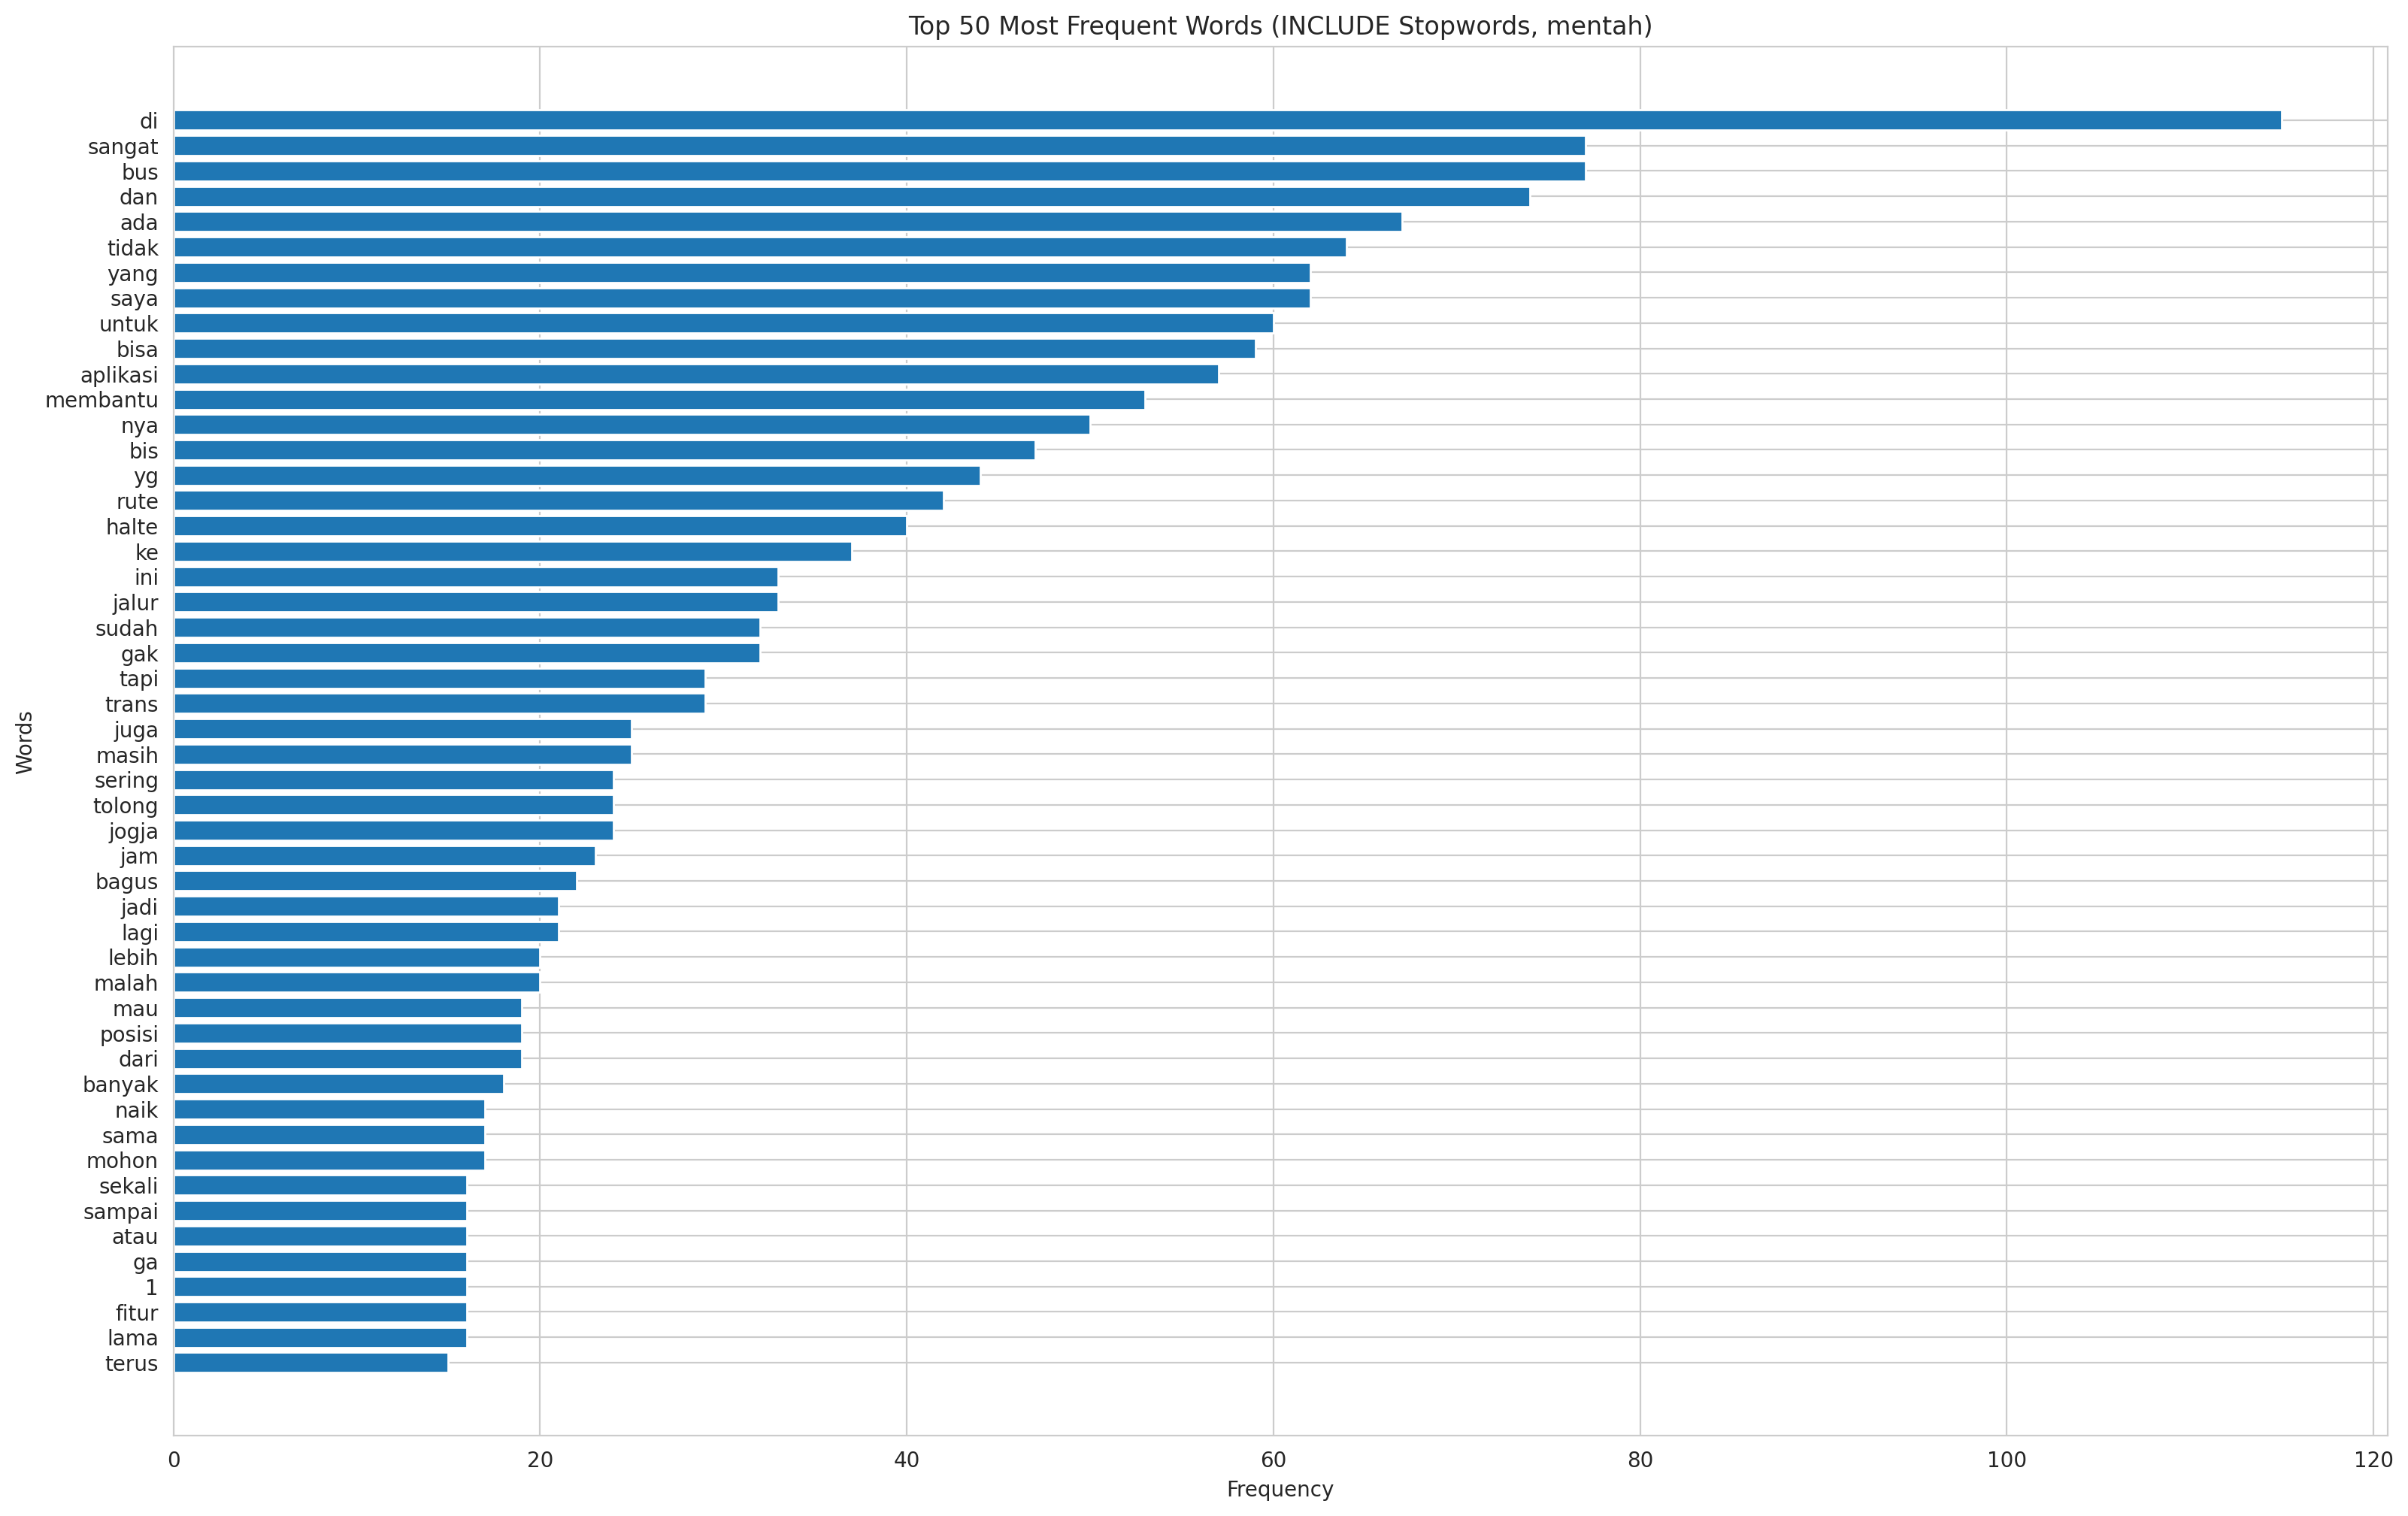

In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

### Ngecek least words

,Word,Frequency
0,min.l,1
1,disempurnakan,1
2,yaa...,1
3,tji,1
4,instruksi,1
5,inovasi,1
6,kembangkan!,1
7,semangat,1
8,jugak...,1
9,masi,1


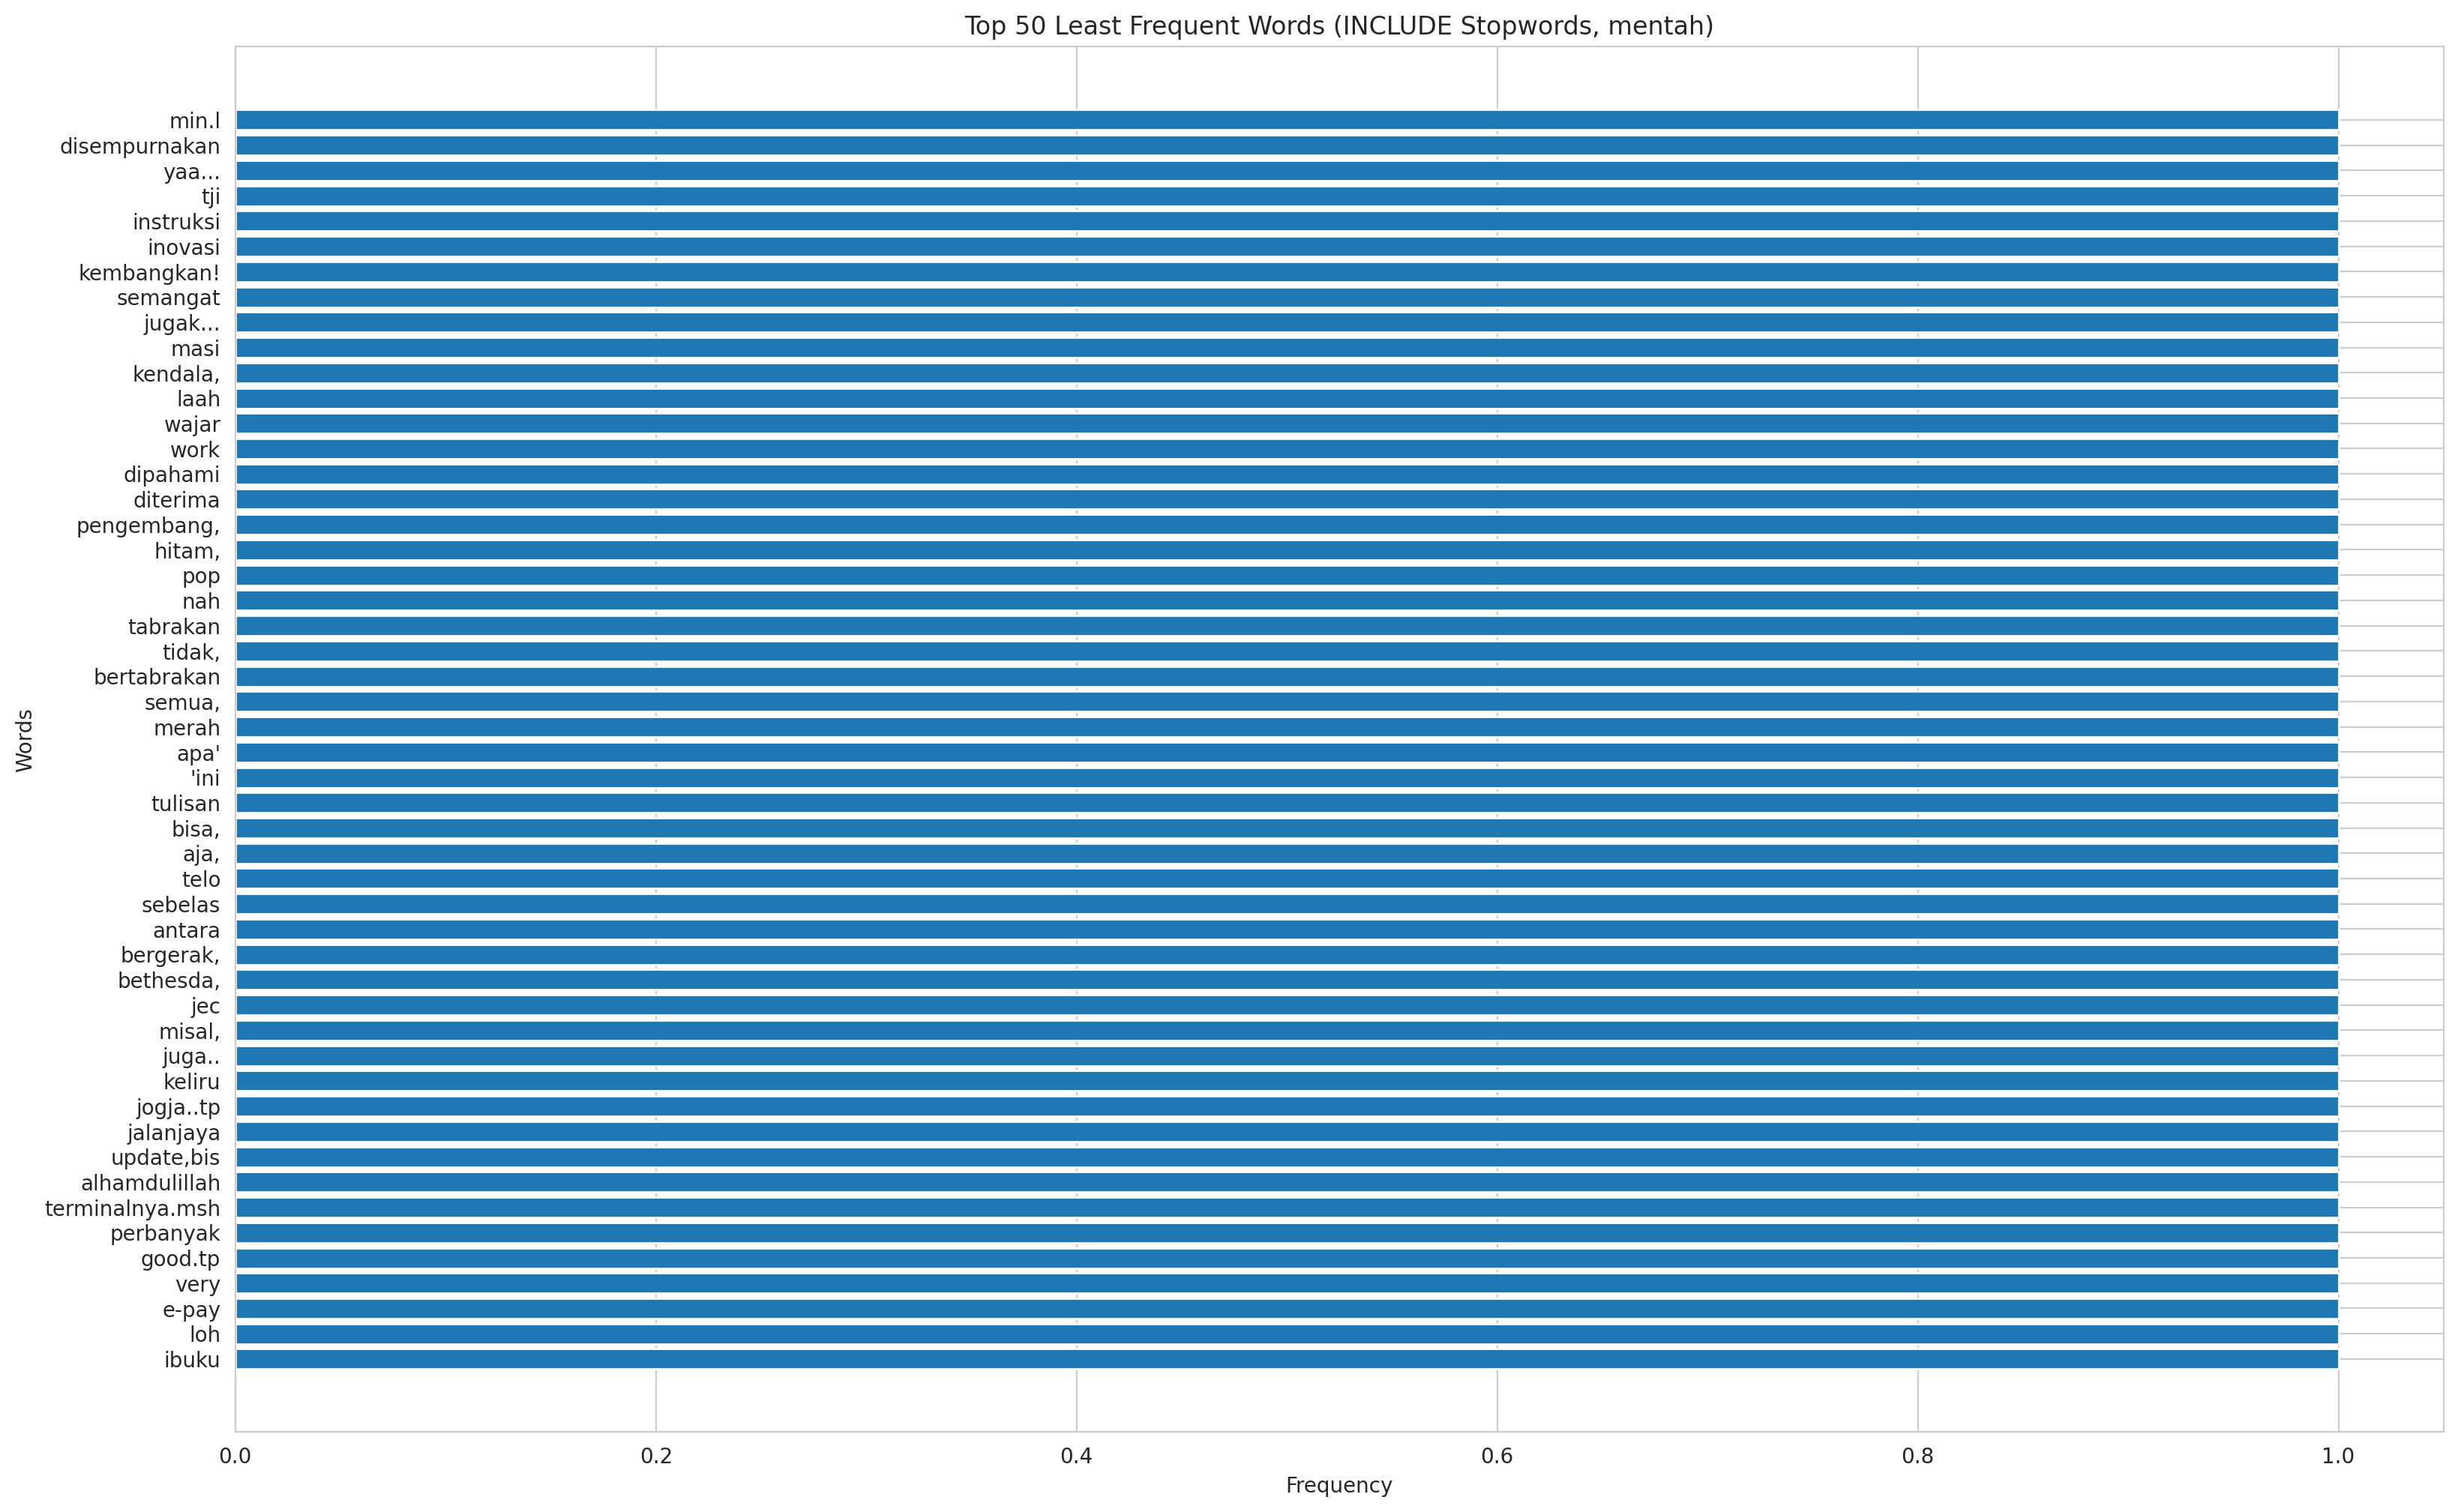

In [9]:
# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


### Regex in action

In [10]:
import pandas as pd
import re
from collections import Counter

# Asumsikan Anda sudah memiliki DataFrame 'df_transjog' dengan kolom 'content'
# Contoh pembuatan DataFrame jika belum ada:
# data = {'content': ['Aplikasi bisnya error dan sering telat',
#                      'terima kasih, app ini sangat membantu. mantap!',
#                      'jadwal tj tidak akurat, mohon perbaiki']}
# df_transjog = pd.DataFrame(data)

# --- LANGKAH 1: PERSIAPAN (KAMUS NORMALISASI) ---

# Buat kamus untuk standardisasi, slang, dan singkatan
normalization_dict = {
    # Normalisasi Kata (termasuk variasi dengan imbuhan)
    r'\b(bis|bisnya|busnya)\b': 'bus',
    r'\b(aplikasinya|app)\b': 'aplikasi',
    r'\b(eror)\b': 'error',
    r'\b(nunggu)\b': 'menunggu',
    r'\b(trans jogja|tj|teje|tji)\b': 'transjogja',
    r'\b(yogyakarta)\b': 'jogjakarta',

    # Penanganan Bahasa Gaul (Slang) & Singkatan
    r'\b(tau)\b': 'tahu',
    r'\b(gw|aku|sy|sya|gue|gua)\b': 'saya',
    r'\b(yaa|yh|yah)\b': 'ya',
    r'\b(teruus|trus|truss)\b': 'terus',
    r'\b(yg)\b': 'yang',
    r'\b(jgn)\b': 'jangan',
    r'\b(jg|jga|jugak)\b': 'juga',
    r'\b(bs|bsa)\b': 'bisa',
    r'\b(bgt)\b': 'banget',
    r'\b(dgn)\b': 'dengan',
    r'\b(kdg)\b': 'kadang',
    r'\b(dlm)\b': 'dalam',
    r'\b(pake)\b': 'pakai',
    r'\b(pakenya)\b': 'pakainya',
    r'\b(dipake)\b': 'dipakai',
    r'\b(liat)\b': 'lihat',
    r'\b(dr)\b': 'dari',
    r'\b(utk)\b': 'untuk',
    r'\b(aj|aja)\b': 'saja',
    r'\b(laah)\b': 'lah',
    r'\b(cm|cuman|cmn|cma)\b': 'cuma',
    r'\b(kl|klo)\b': 'kalau',
    r'\b(sdh|dh|dah|sudh)\b': 'sudah',
    r'\b(msh|masi)\b': 'masih',
    r'\b(krg)\b': 'kurang',
    r'\b(mntap|mamtap)\b': 'mantap',
    r'\b(ts)\b': 'terus',
    r'\b(smpe|sampe)\b': 'sampai',
    r'\b(brarti)\b': 'berarti',
    r'\b(tak|tdk|ngga|gak|ga|gk|nggak|nggk|kaga|kagak)\b': 'tidak',
    r'\b(dh|dah)\b': 'deh',
    r'\b(thx|trims|thanks|makasi|makasih|trimakasih|terima kasih)\b': 'terimakasih',
    r'\b(gblk)\b': 'goblok',
    r'\b(klo|kalo)\b': 'kalau',
    r'\b(apk|apl|aplksi|app|apps)\b': 'aplikasi',
    r'\b(hafal|hapal)\b': 'hafal',
    r'\b(hafalin|hapalin)\b': 'menghafal',
    r'\b(benerin)\b': 'benarkan',
    r'\b(gmna|gmn|gimn|gimna|gmna)\b': 'bagaimana',
    r'\b(tp)\b': 'tapi',
    r'\b(jd)\b': 'jadi'
}

# --- LANGKAH 2: BUAT FUNGSI PEMBERSIHAN ---

def clean_and_normalize(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()

    # 2. Terapkan kamus normalisasi menggunakan regex
    for pattern, replacement in normalization_dict.items():
        text = re.sub(pattern, replacement, text)

    # 3. Hapus semua tanda baca, simbol, dan angka
    text = re.sub(r'[^a-z\s]+', ' ', text)

    # 4. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. Normalisasi huruf ganda di akhir kata (misal: 'baguss' -> 'bagus' 'sekalii' -> 'sekali')
    text = re.sub(r'(.)\1\b', r'\1', text)

    # 6. (BARU) Koreksi akhiran 'ny' menjadi 'nya'
    text = re.sub(r'ny\b', 'nya', text)

    return text

# --- LANGKAH 3: TERAPKAN FUNGSI KE DATAFRAME ---

# Buat kolom baru untuk menyimpan teks yang sudah bersih
df_transjog['content_cleaned'] = df_transjog['content'].apply(clean_and_normalize)

print("--- CONTOH HASIL PEMBERSIHAN ---")
print(df_transjog[['content', 'content_cleaned']].head())
print("\n" + "="*50 + "\n")


# --- LANGKAH 4: ANALISIS ULANG FREKUENSI KATA ---

# Gabungkan semua teks bersih menjadi satu paragraf besar
all_text = ' '.join(df_transjog['content_cleaned'])

# Lakukan tokenisasi (memecah menjadi kata-kata)
tokens = all_text.split()

# Hitung frekuensi setiap kata
# Anda bisa menambahkan stopwords di sini jika perlu
# stopwords_indonesia = ['di', 'dan', 'yang', 'ini', 'itu', ...]
# tokens = [word for word in tokens if word not in stopwords_indonesia]

word_counts = Counter(tokens)

# Tampilkan 50 kata paling umum setelah dibersihkan
print("--- FREKUENSI KATA SETELAH DIBERSIHKAN (TOP 50) ---")
print(word_counts.most_common(50))

--- CONTOH HASIL PEMBERSIHAN ---
                                                                                                                                                                                                   content  \
0                                                                                                                                                                   aplikasi berguna, tapi terkadang error   
1                                                                                                                                                               membantu pulang sekolah dan menghemat uang   
2  aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli etiket secara online. semoga update selanjutnya bisa men...   
3                                                                                                                                              

In [11]:
df_transjog['content_cleaned'] = df_transjog['content_cleaned'].apply(clean_and_normalize)
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned
0,509d3535-63e4-47b3-9ff4-a3d8f6edde70,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjWdDOa6AvOjN9UFwQFpbr1zaqTYZNCMeJPmOCsCYpDG6aS6gCOd,"aplikasi berguna, tapi terkadang error",5,0,2.3.7,2025-10-11 10:45:51,NaN,NaN,2.3.7,aplikasi berguna tapi terkadang error
1,036ad8cb-17e3-42bb-8632-e052797b1c0e,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjVGsUNSPnOGUXjKL0DsMZpwYIu8noP2XWjsmrRbn7ENd81V34uV,membantu pulang sekolah dan menghemat uang,5,0,2.3.7,2025-10-10 12:01:18,NaN,NaN,2.3.7,membantu pulang sekolah dan menghemat uang
2,227092a9-16bb-475b-9988-7b95f44a9fe4,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJze5GdyBK1R3INtU8MMaHJoWZcVevWXawdcAkuc3thOx5ojw=mo,"aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli etiket secara online. semoga update selanjutnya bisa men...",5,0,NaN,2025-10-10 06:50:15,NaN,NaN,NaN,aplikasi ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank gopay dana ovo dl sehingga memudahkan untuk beli etiket secara online semoga update selanjutnya bisa menampilkan...
3,133de1db-1700-4d77-8340-665f2f056125,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJmvBhx8Lb1L0lYHaKdV158pypVWVKgE8LEyE2mlDtkaBUMgA=mo,oke,5,0,2.3.7,2025-10-06 03:28:55,NaN,NaN,2.3.7,oke
4,2412c1af-ad3b-4e5e-aa99-bf4814480823,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJYND8PrhN9ny8xoR3CG2xmddOUvVjCVGvwGljKakPceV--Lkg=mo,bagus,5,0,2.3.5,2025-10-01 13:13:57,NaN,NaN,2.3.5,bagus
...,...,...,...,...,...,...,...,...,...,...,...,...
339,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"work banget sih, wajar laah kalo banyak kendala, masi baru jugak... semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0,work banget sih wajar lah kalau banyak kendala masih baru juga semangat dan kembangkan
340,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,inovasi pelayanan,5,0,NaN,2020-01-30 12:38:28,NaN,NaN,NaN,inovasi pelayanan
341,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,install >> lihat instruksi >> harus login ? >> uninstall,5,1,NaN,2020-01-30 08:57:06,NaN,NaN,NaN,instal lihat instruksi harus login uninstal
342,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,update tji,4,1,1.0,2020-01-29 15:26:20,NaN,NaN,1.0,update transjogja


### After: ngecek freq least words

,Word,Frequency
0,bus,162
1,tidak,140
2,di,116
3,yang,106
4,aplikasi,88
5,dan,78
6,sangat,78
7,saya,76
8,ada,71
9,bisa,65


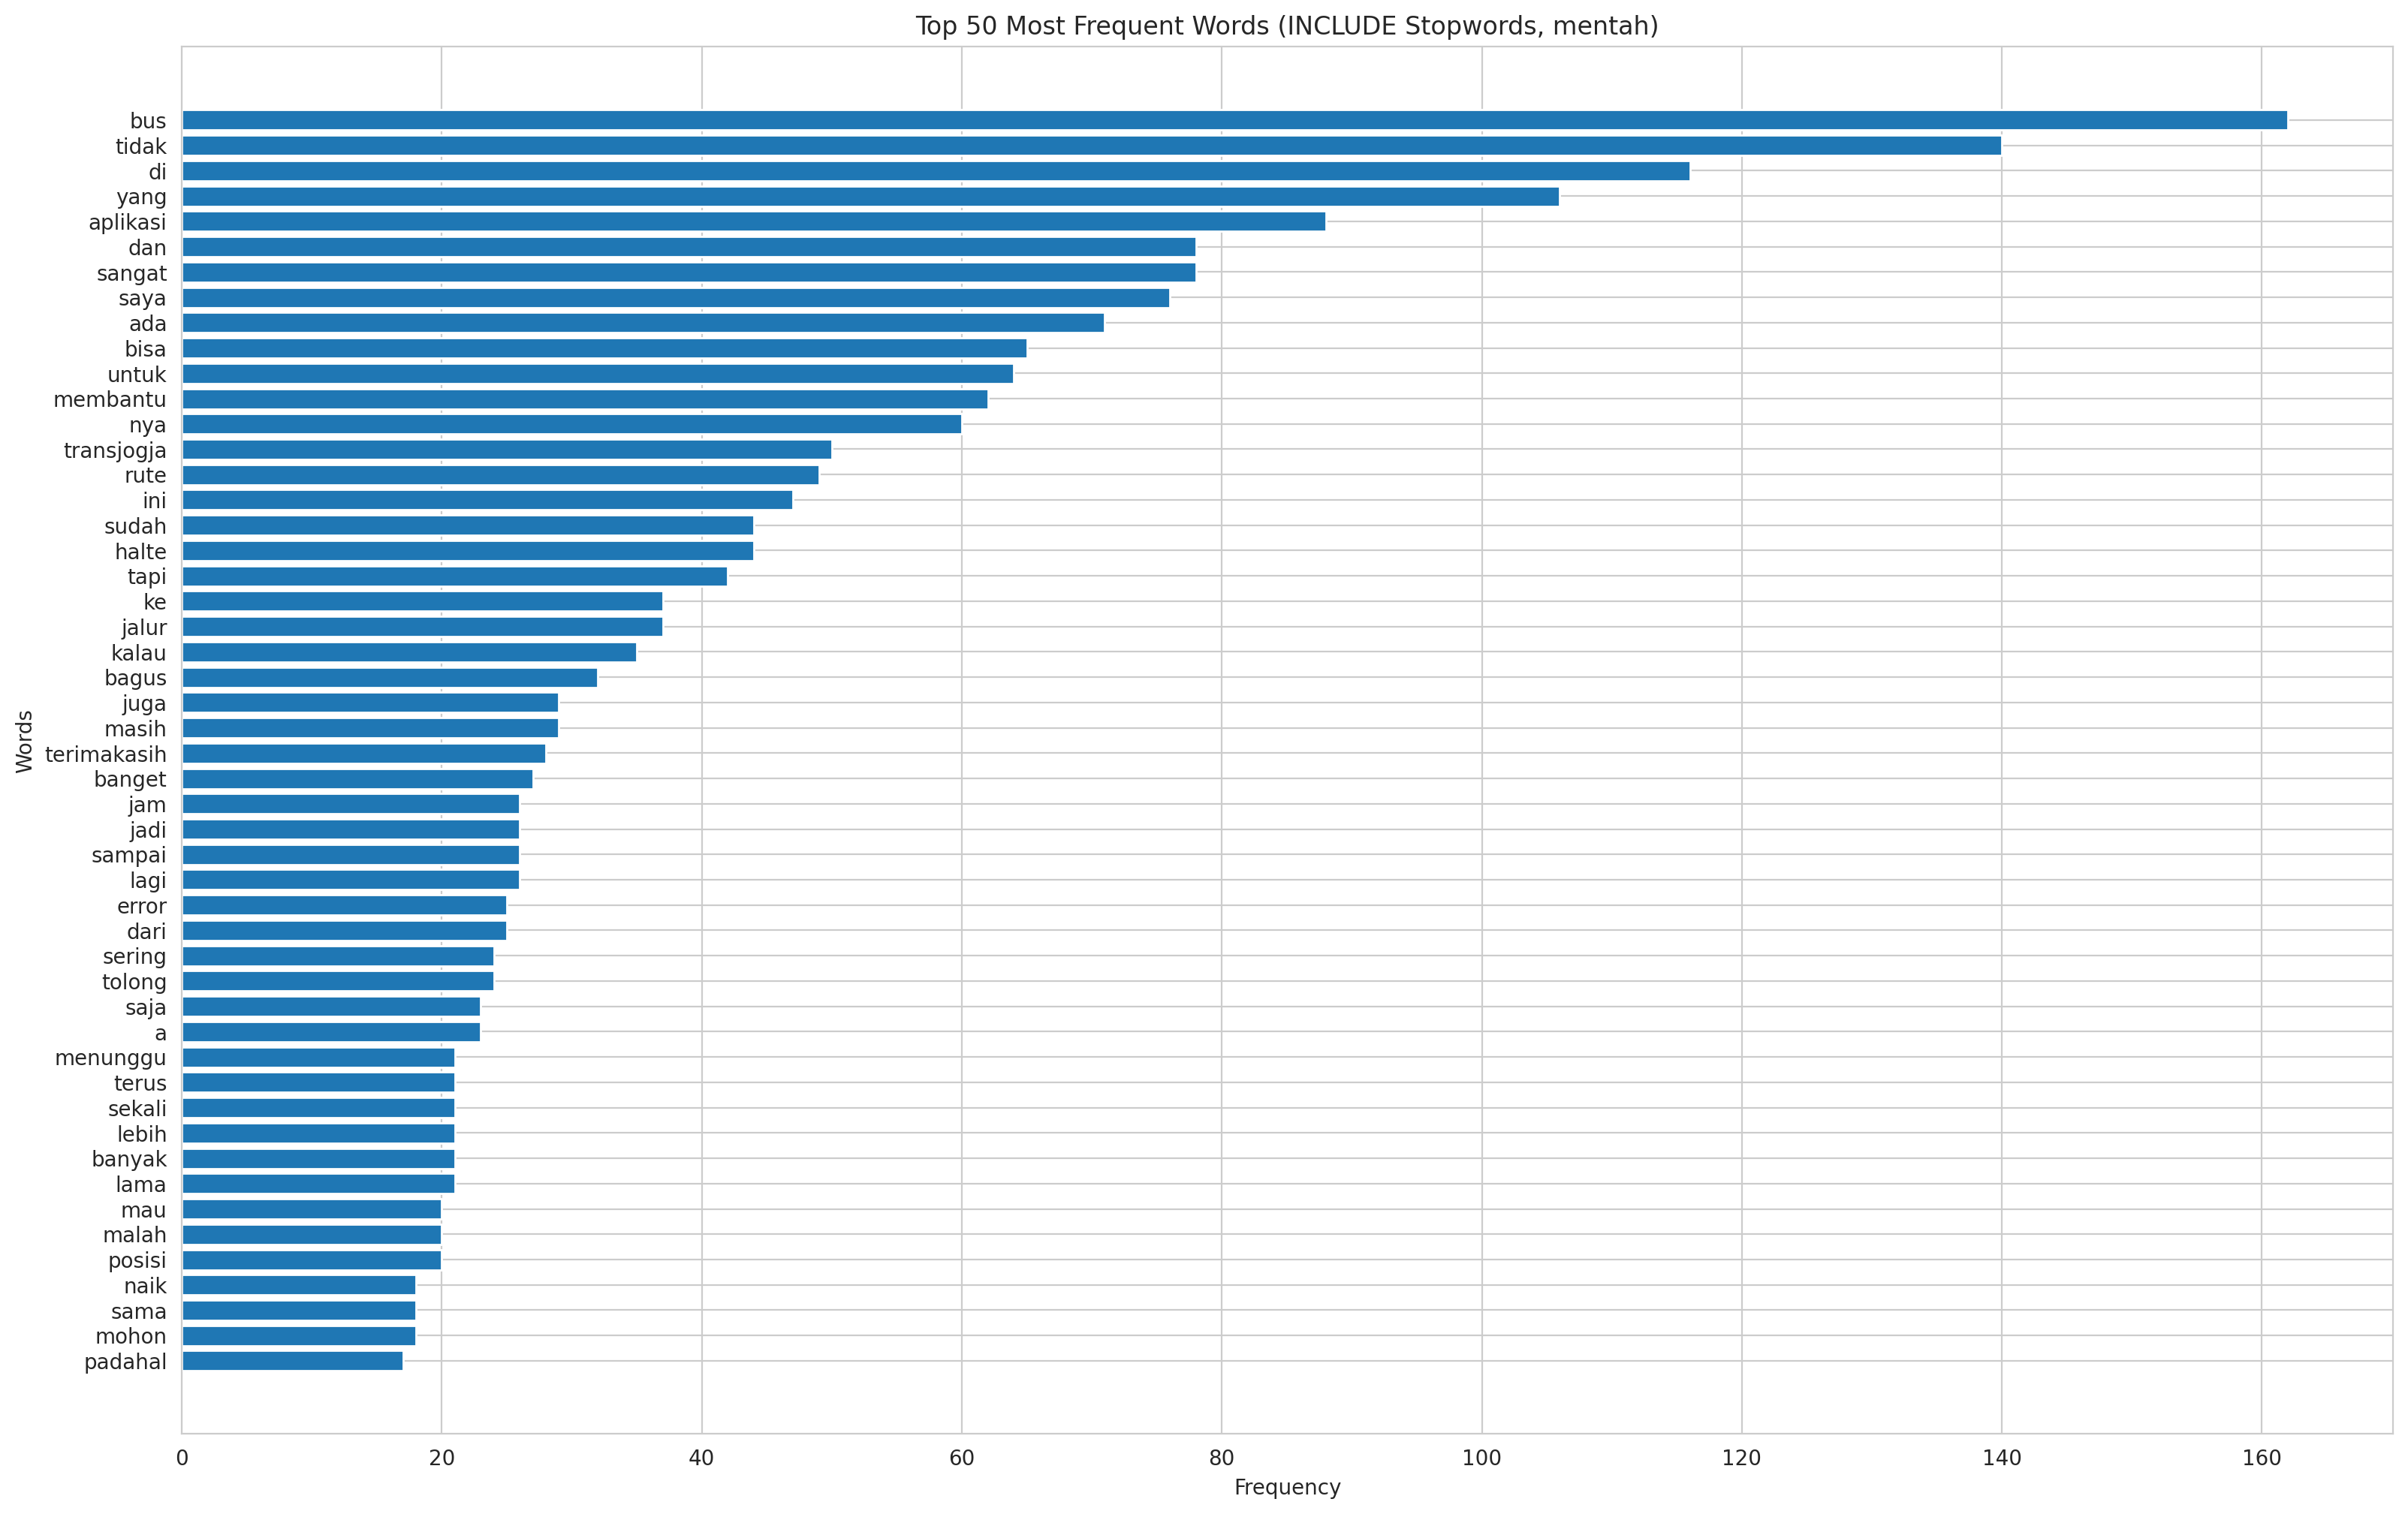

,Word,Frequency
0,l,1
1,instruksi,1
2,inovasi,1
3,kembangkan,1
4,semangat,1
5,kendala,1
6,wajar,1
7,work,1
8,dipahami,1
9,diterima,1


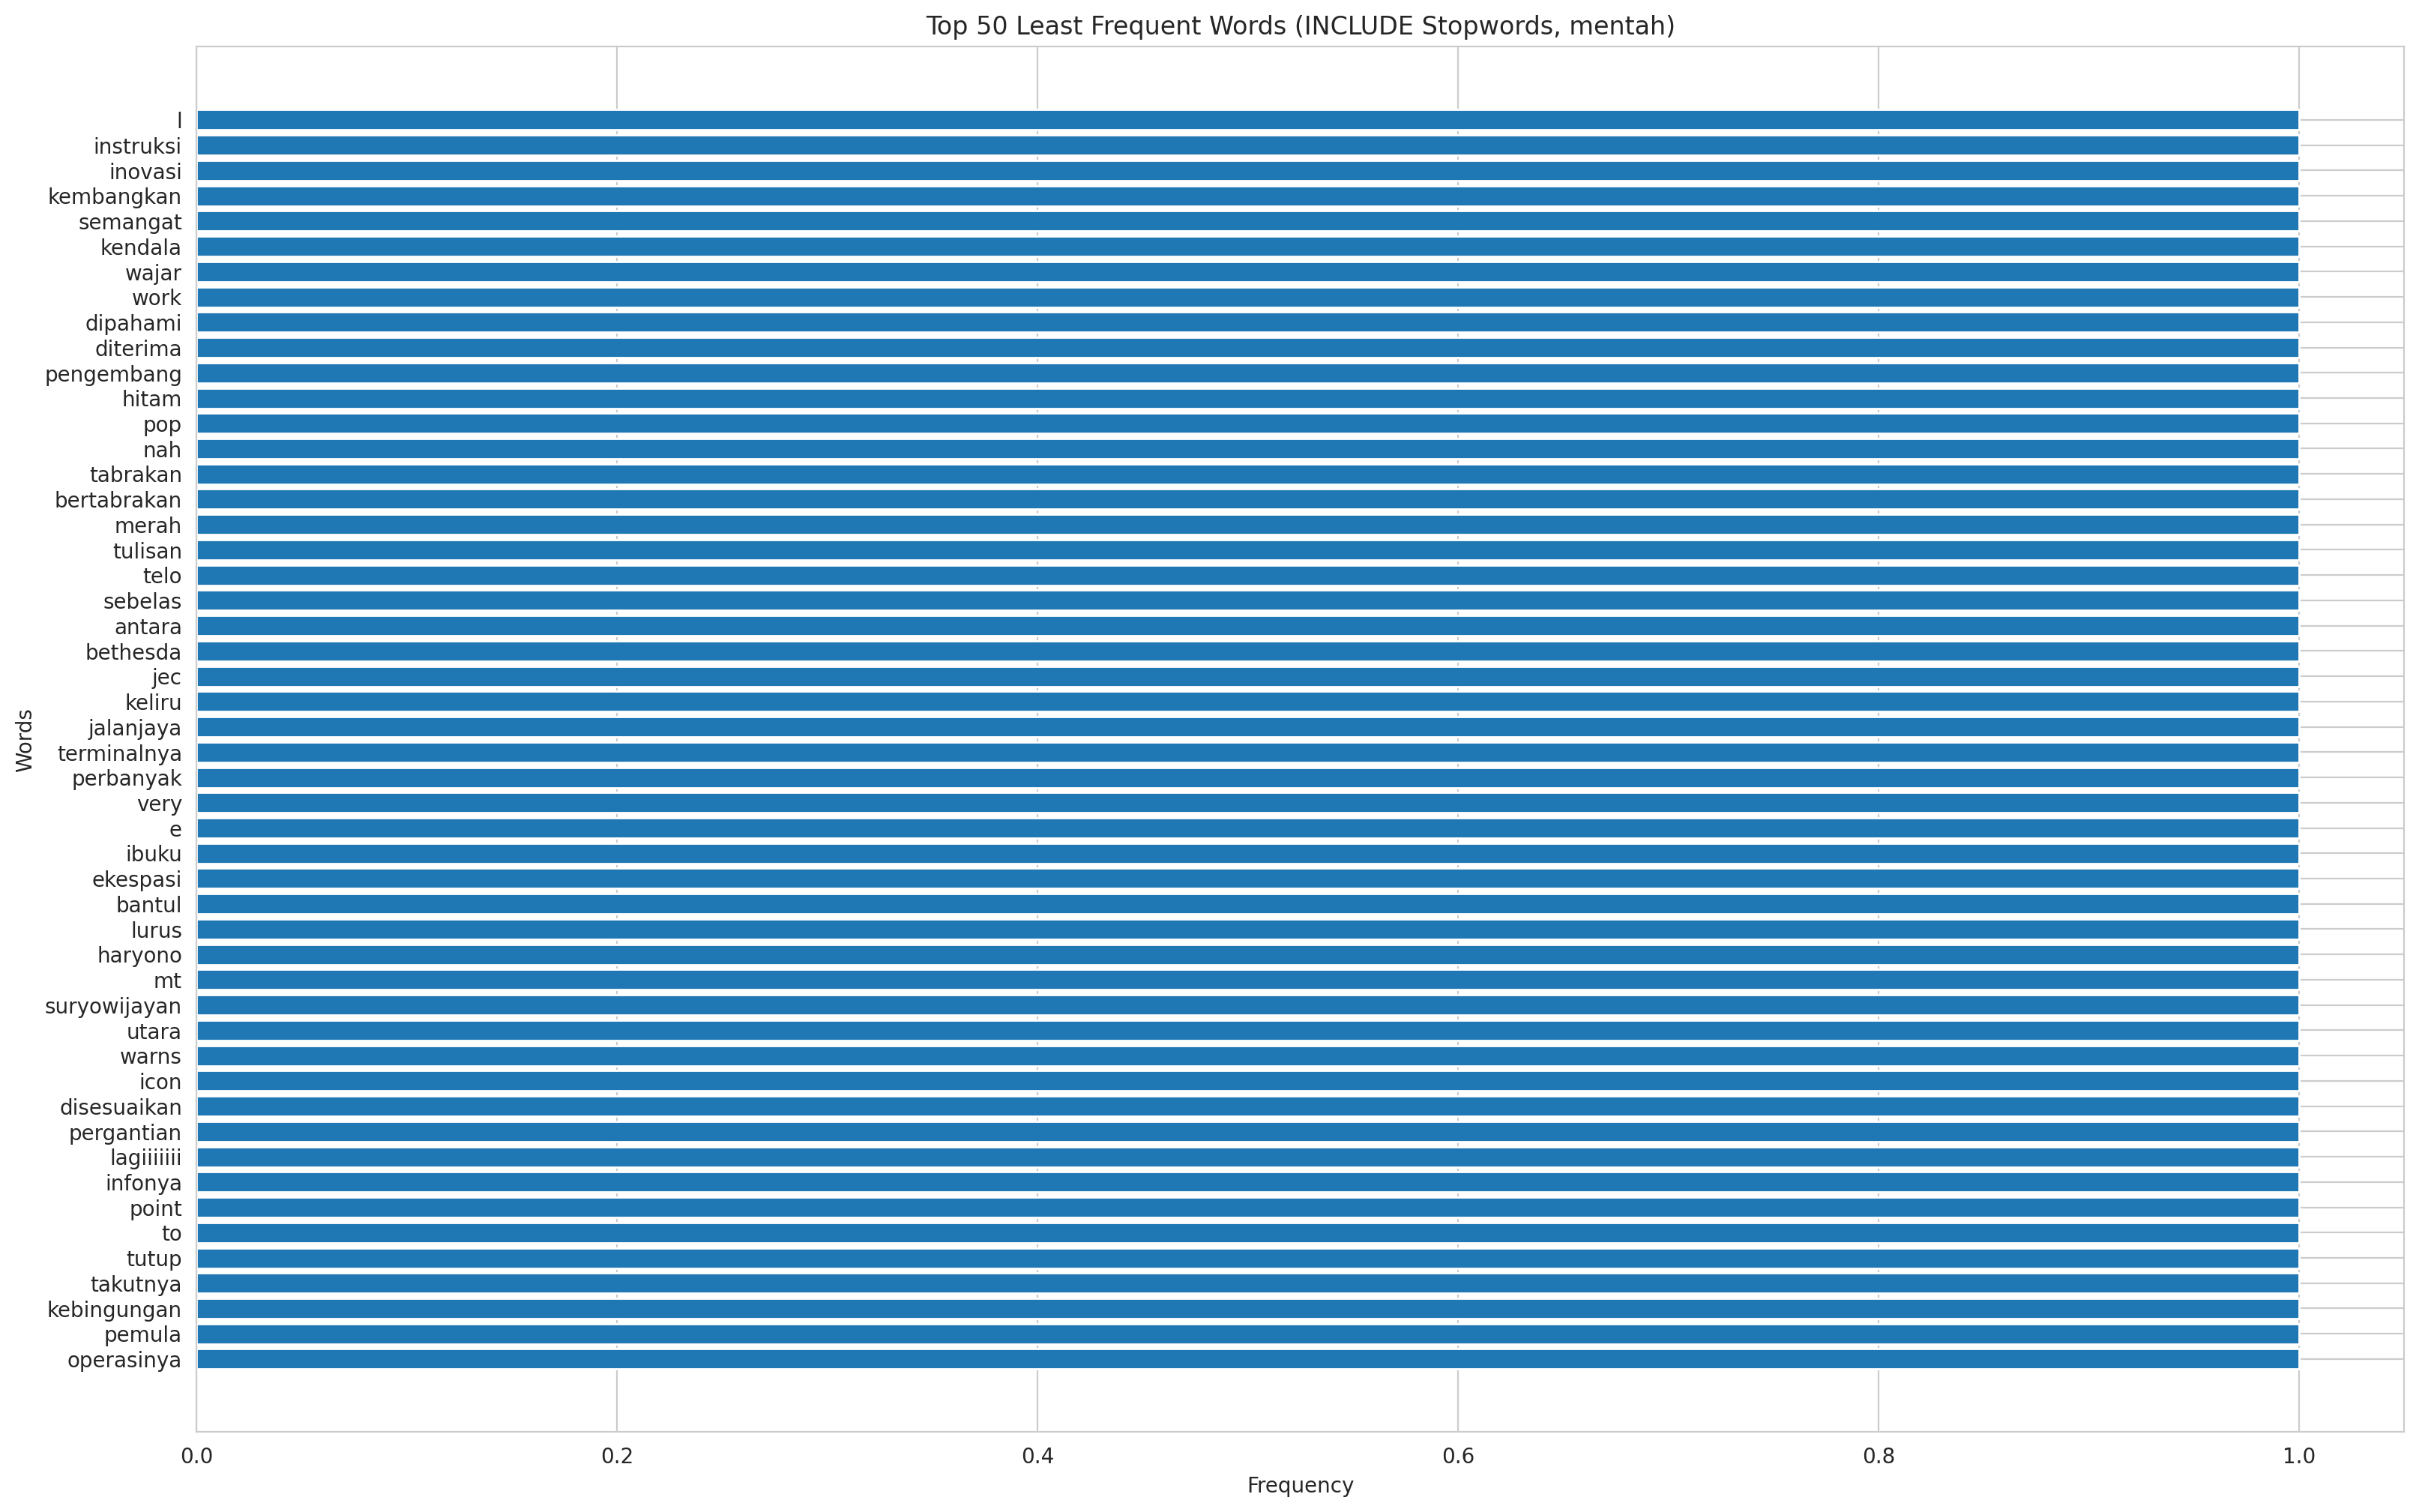

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


## TOKENIZATION & STOPWORD REMOVAL

### Download, new column

In [13]:
import nltk
from nltk.tokenize import word_tokenize

# pastikan resource punkt udah ada
nltk.download('punkt_tab')

# bikin kolom baru 'tokens' hasil tokenisasi
df_transjog['tokens'] = df_transjog['content_cleaned'].apply(word_tokenize)

# cek hasilnya
print(df_transjog[['content_cleaned', 'tokens']].head(10))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                                                                                                                                                           content_cleaned  \
0                                                                                                                                                                    aplikasi berguna tapi terkadang error   
1                                                                                                                                                               membantu pulang sekolah dan menghemat uang   
2  aplikasi ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank gopay dana ovo dl sehingga memudahkan untuk beli etiket secara online semoga update selanjutnya bisa menampilkan...   
3                                                                                                                                                                               

### Freq words

In [14]:
# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Import FreqDist from nltk.probability
    from nltk.probability import FreqDist
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # selecting top N most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20, 5))
    # Use the 'rainbow' colormap for the bar plot
    ax = sns.barplot(data=d, x="word", y="count")
    # , palette="rainbow"
    ax.set(ylabel='Count')

    # Tambahin title
    plt.title(f"Most Frequent Words (Before Stop Words Removal) - Top {terms}")

    plt.show()

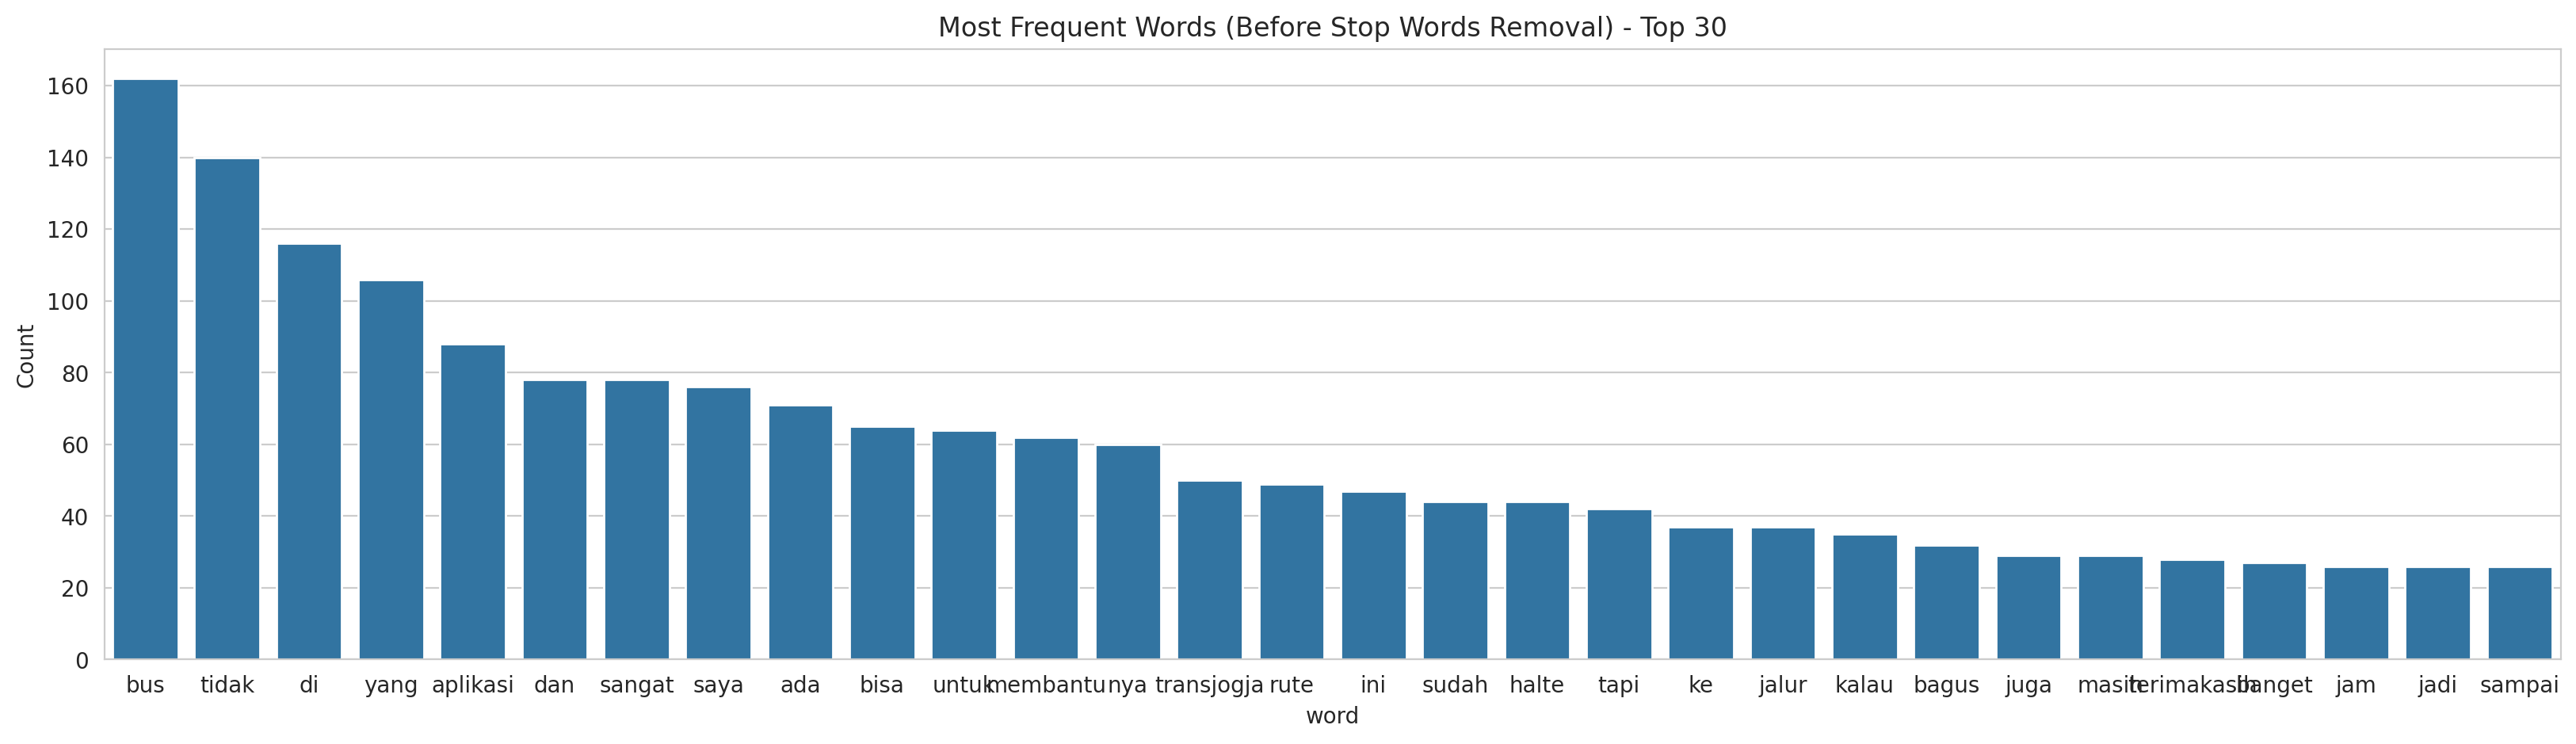

In [15]:
freq_words(df_transjog['content_cleaned'])

### Indonesian stopwords

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
print(len(indonesian_stopwords))

758


### Freq words excluding stopwords

,Word,Frequency
0,bus,162
1,aplikasi,88
2,membantu,62
3,nya,60
4,transjogja,50
5,rute,49
6,halte,44
7,jalur,37
8,bagus,32
9,terimakasih,28


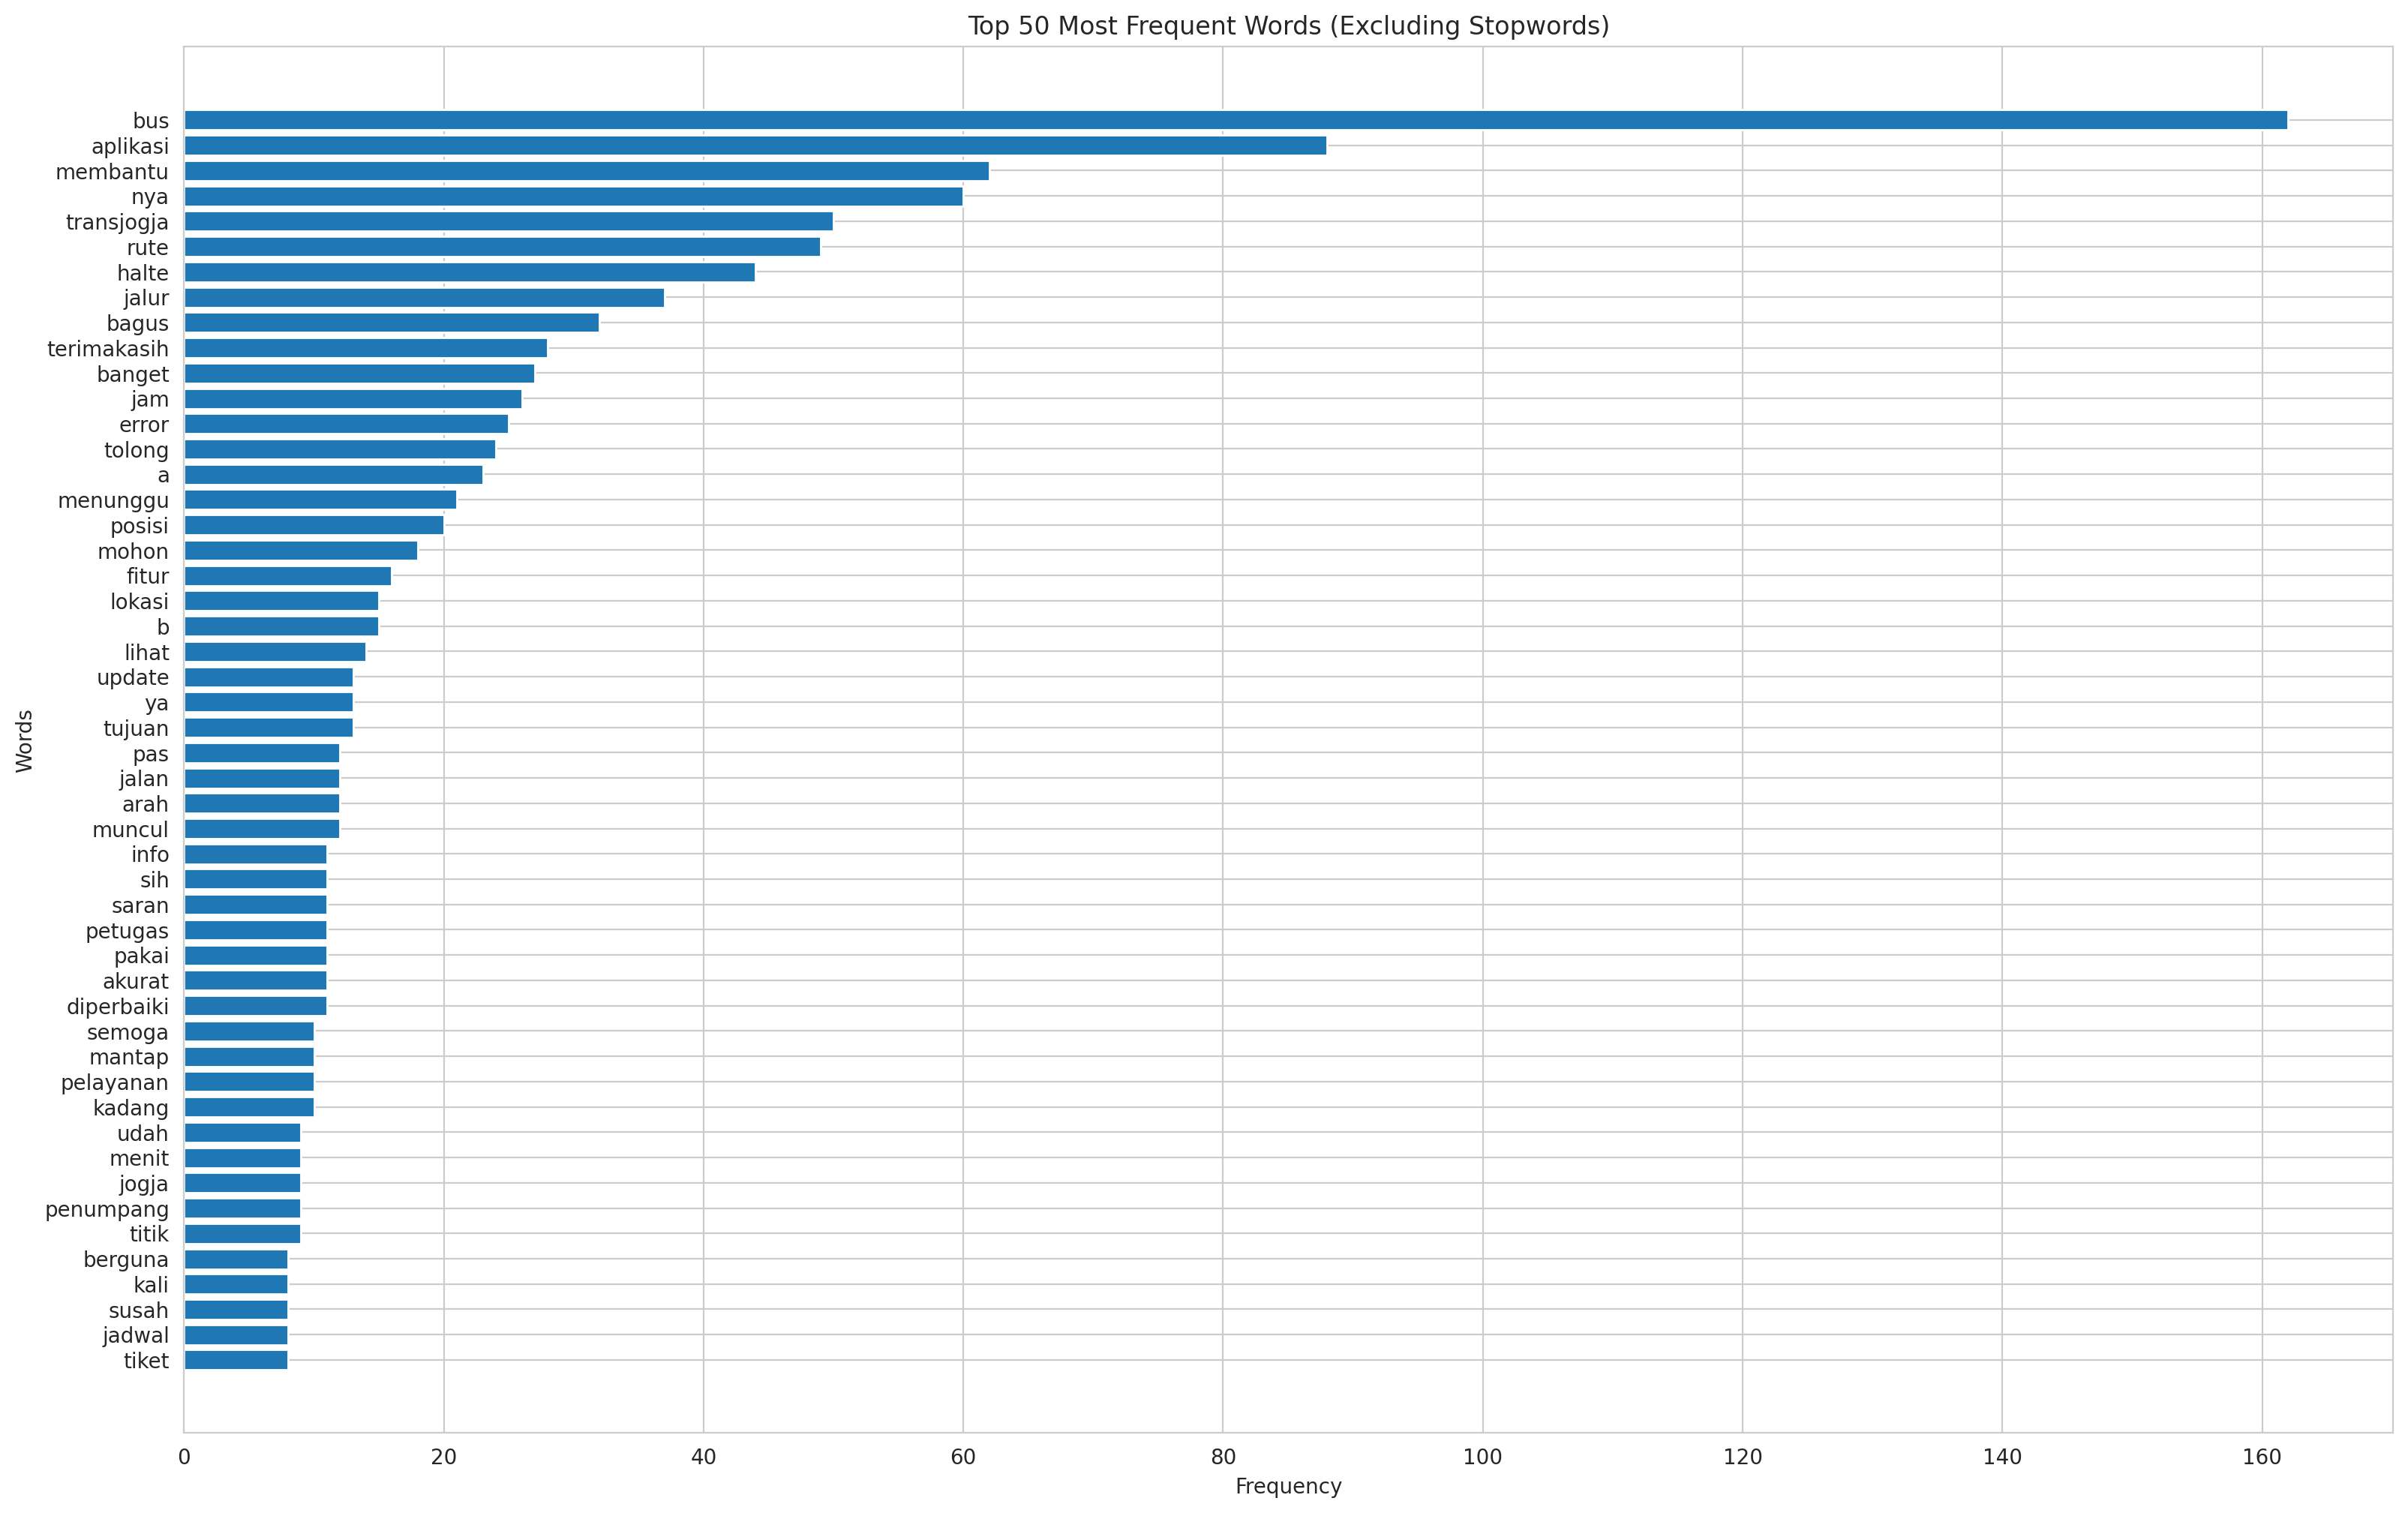

In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Cek common words

In [19]:
common_words

[('bus', 162),
 ('aplikasi', 88),
 ('membantu', 62),
 ('nya', 60),
 ('transjogja', 50),
 ('rute', 49),
 ('halte', 44),
 ('jalur', 37),
 ('bagus', 32),
 ('terimakasih', 28),
 ('banget', 27),
 ('jam', 26),
 ('error', 25),
 ('tolong', 24),
 ('a', 23),
 ('menunggu', 21),
 ('posisi', 20),
 ('mohon', 18),
 ('fitur', 16),
 ('lokasi', 15),
 ('b', 15),
 ('lihat', 14),
 ('update', 13),
 ('ya', 13),
 ('tujuan', 13),
 ('pas', 12),
 ('jalan', 12),
 ('arah', 12),
 ('muncul', 12),
 ('info', 11),
 ('sih', 11),
 ('saran', 11),
 ('petugas', 11),
 ('pakai', 11),
 ('akurat', 11),
 ('diperbaiki', 11),
 ('semoga', 10),
 ('mantap', 10),
 ('pelayanan', 10),
 ('kadang', 10),
 ('udah', 9),
 ('menit', 9),
 ('jogja', 9),
 ('penumpang', 9),
 ('titik', 9),
 ('berguna', 8),
 ('kali', 8),
 ('susah', 8),
 ('jadwal', 8),
 ('tiket', 8)]

### Custom stopwords

In [20]:
# Pastikan indonesian_stopwords berbentuk set
indonesian_stopwords = set(indonesian_stopwords)

# Add custom stopwords dari hasil top 100 frequent words
custom_stopwords = {
    # filler umum
    "saya","ya","kok","mah","loh","lho","pls","please","ny","nya","deh","juga","yang", "sih"
    #"ga", "gak", "gk", "udah", "udh", "aja", "ya", "tp", "bgt", "ok", "gw", "sih",
    # kata ganti/partikel
    #"nya", "yg", "kalo", "d", "in",
    # tanda baca/angka
    #",", ".", "1", "2","&"
    # umum tidak bermakna kontekstual
    #"aja", "mulu", "udah", "udh", "sampe",
    # terkait servis
    #"transjogja","bus"
    #"bus","bis","aplikasi"
}


# Pastikan kata-kata penting tidak ikut jadi stopwords
for word in ["luar", "biasa", "baik","tepat"]:
    indonesian_stopwords.discard(word)

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)

print("Updated stopwords:", sorted(indonesian_stopwords))

Updated stopwords: ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'be

### Freq words excluding custom stopwords

Words removed by custom stopwords:


,Word,Frequency
0,tidak,140
1,di,116
2,yang,106
3,dan,78
4,sangat,78
...,...,...
251,terakhir,1
252,sini,1
253,sejauh,1
254,antara,1


,Word,Frequency
0,bus,162
1,aplikasi,88
2,membantu,62
3,transjogja,50
4,rute,49
...,...,...
95,telat,5
96,gerak,5
97,min,5
98,bintang,5


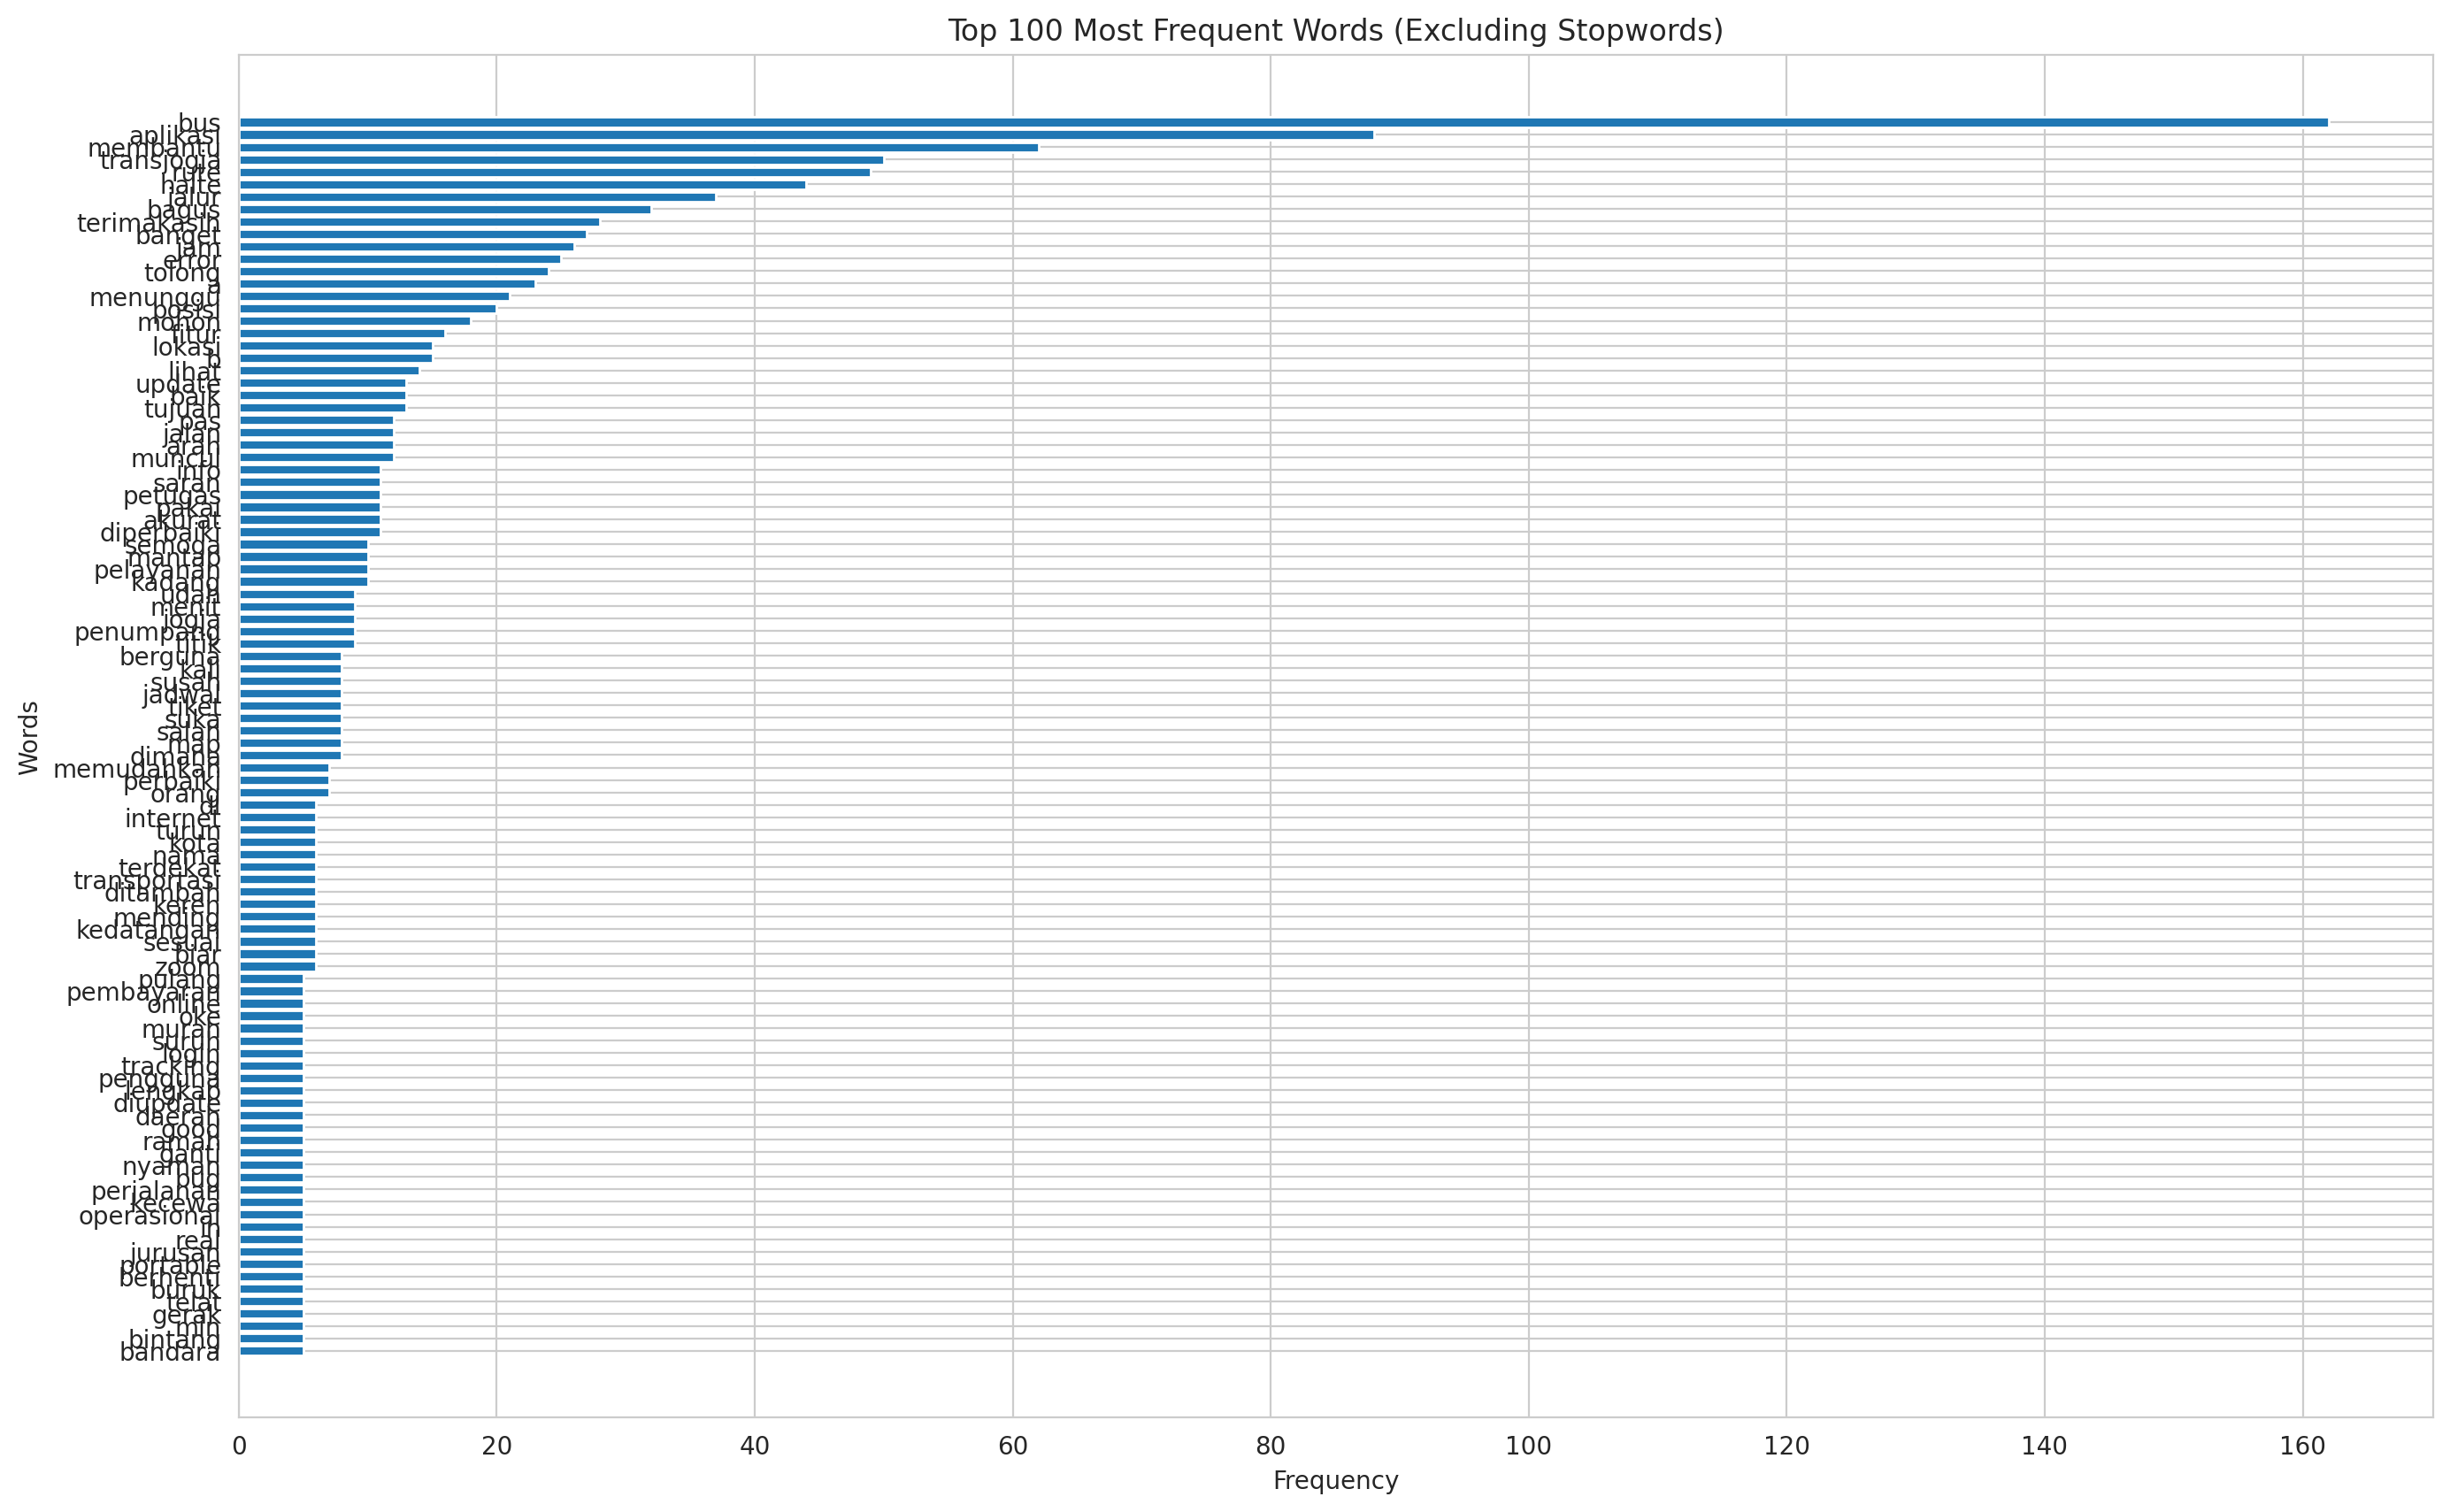

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content_cleaned'
text_column = 'content_cleaned'

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words
words = [word.lower() for word in all_text.split()]

# Cari kata yang kehapus karena stopwords
removed_words = [word for word in words if word in indonesian_stopwords]

# Hitung frekuensi kata yang kehapus
removed_counts = Counter(removed_words)
removed_df = pd.DataFrame(removed_counts.most_common(), columns=['Word', 'Frequency'])

print("Words removed by custom stopwords:")
display(removed_df)

# Filter stopwords
filtered_words = [word for word in words if word not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
#colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    #color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()

### Remove all stopwords

In [22]:
# fungsi untuk hapus stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        return ' '.join([w for w in words if w not in indonesian_stopwords])
    return text

# bikin kolom baru di dataframe
df_transjog['content_cleaned_stopwords'] = df_transjog['content_cleaned'].apply(remove_stopwords)

# cek hasil
print(df_transjog[['content','content_cleaned', 'content_cleaned_stopwords']].head(10))

                                                                                                                                                                                                   content  \
0                                                                                                                                                                   aplikasi berguna, tapi terkadang error   
1                                                                                                                                                               membantu pulang sekolah dan menghemat uang   
2  aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli etiket secara online. semoga update selanjutnya bisa men...   
3                                                                                                                                                                               

In [23]:

df_transjog['clean_tokens'] = df_transjog['tokens'].apply(
    lambda toks: [w for w in toks if w not in indonesian_stopwords]
)

In [24]:
# Liat 5 baris pertama
print(df_transjog[['content','content_cleaned','content_cleaned_stopwords', 'tokens', 'clean_tokens']].head())

# Liat baris tertentu (misal index ke-100)
print(df_transjog[['content','content_cleaned', 'content_cleaned_stopwords','tokens', 'clean_tokens']].iloc[100])

# Kalau mau tampil rapi (pake Pandas display)
import pandas as pd
pd.set_option('max_colwidth', 200)  # biar teksnya ga dipotong
display(df_transjog[['content','content_cleaned','content_cleaned_stopwords', 'tokens', 'clean_tokens']].sample(5))

                                                                                                                                                                                                   content  \
0                                                                                                                                                                   aplikasi berguna, tapi terkadang error   
1                                                                                                                                                               membantu pulang sekolah dan menghemat uang   
2  aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli etiket secara online. semoga update selanjutnya bisa men...   
3                                                                                                                                                                               

,content,content_cleaned,content_cleaned_stopwords,tokens,clean_tokens
15,"bagus, tp kursng lengkap terutama info rute, bisa diupdate berkala sepertinya",bagus tapi kursng lengkap terutama info rute bisa diupdate berkala sepertinya,bagus kursng lengkap info rute diupdate berkala,"[bagus, tapi, kursng, lengkap, terutama, info, rute, bisa, diupdate, berkala, sepertinya]","[bagus, kursng, lengkap, info, rute, diupdate, berkala]"
175,"daftar sopir dan kernet yg pernah bahkan sering bermasalah & melanggar terutama ke customer (1) 3a & 3b sering bgt di depan polsek depok timur. (2) 15 nomer 28, 29, 07 ab 7326 bk -+ jam 9.23/28 ok...",daftar sopir dan kernet yang pernah bahkan sering bermasalah melanggar terutama ke customer a b sering banget di depan polsek depok timur nomer ab bk jam okt di ngabean okt di queen latifa dl lupa...,daftar sopir kernet bermasalah melanggar customer a b banget polsek depok timur nomer ab bk jam okt ngabean okt queen latifa dl lupa byk banget banget,"[daftar, sopir, dan, kernet, yang, pernah, bahkan, sering, bermasalah, melanggar, terutama, ke, customer, a, b, sering, banget, di, depan, polsek, depok, timur, nomer, ab, bk, jam, okt, di, ngabea...","[daftar, sopir, kernet, bermasalah, melanggar, customer, a, b, banget, polsek, depok, timur, nomer, ab, bk, jam, okt, ngabean, okt, queen, latifa, dl, lupa, byk, banget, banget]"
337,"saran aja, kalau bisa, warna tulisan untuk keterangan 'ini bus apa' diganti sesuai warna titik bus nya, tidak merah semua, biar kalau ada titik bus yang bertabrakan itu kita bisa tau salah klik at...",saran saja kalau bisa warna tulisan untuk keterangan ini bus apa diganti sesuai warna titik bus nya tidak merah semua biar kalau ada titik bus yang bertabrakan itu kita bisa tahu salah klik atau t...,saran warna tulisan keterangan bus diganti sesuai warna titik bus merah biar titik bus bertabrakan salah klik titik bus jalur tabrakan pas klik no pop up muncul warna hitam terimakasih pengembang ...,"[saran, saja, kalau, bisa, warna, tulisan, untuk, keterangan, ini, bus, apa, diganti, sesuai, warna, titik, bus, nya, tidak, merah, semua, biar, kalau, ada, titik, bus, yang, bertabrakan, itu, kit...","[saran, warna, tulisan, keterangan, bus, diganti, sesuai, warna, titik, bus, merah, biar, titik, bus, bertabrakan, salah, klik, titik, bus, jalur, tabrakan, pas, klik, no, pop, up, muncul, warna, ..."
238,sangat membantu mungkin yg kasi bintang jelek itu hpnya blm canggih,sangat membantu mungkin yang kasi bintang jelek itu hpnya blm canggih,membantu kasi bintang jelek hpnya blm canggih,"[sangat, membantu, mungkin, yang, kasi, bintang, jelek, itu, hpnya, blm, canggih]","[membantu, kasi, bintang, jelek, hpnya, blm, canggih]"
217,versi sekarang lebih baik,versi sekarang lebih baik,versi baik,"[versi, sekarang, lebih, baik]","[versi, baik]"


### Cek freq and least

,Word,Frequency
0,bus,162
1,aplikasi,88
2,membantu,62
3,transjogja,50
4,rute,49
5,halte,44
6,jalur,37
7,bagus,32
8,terimakasih,28
9,banget,27


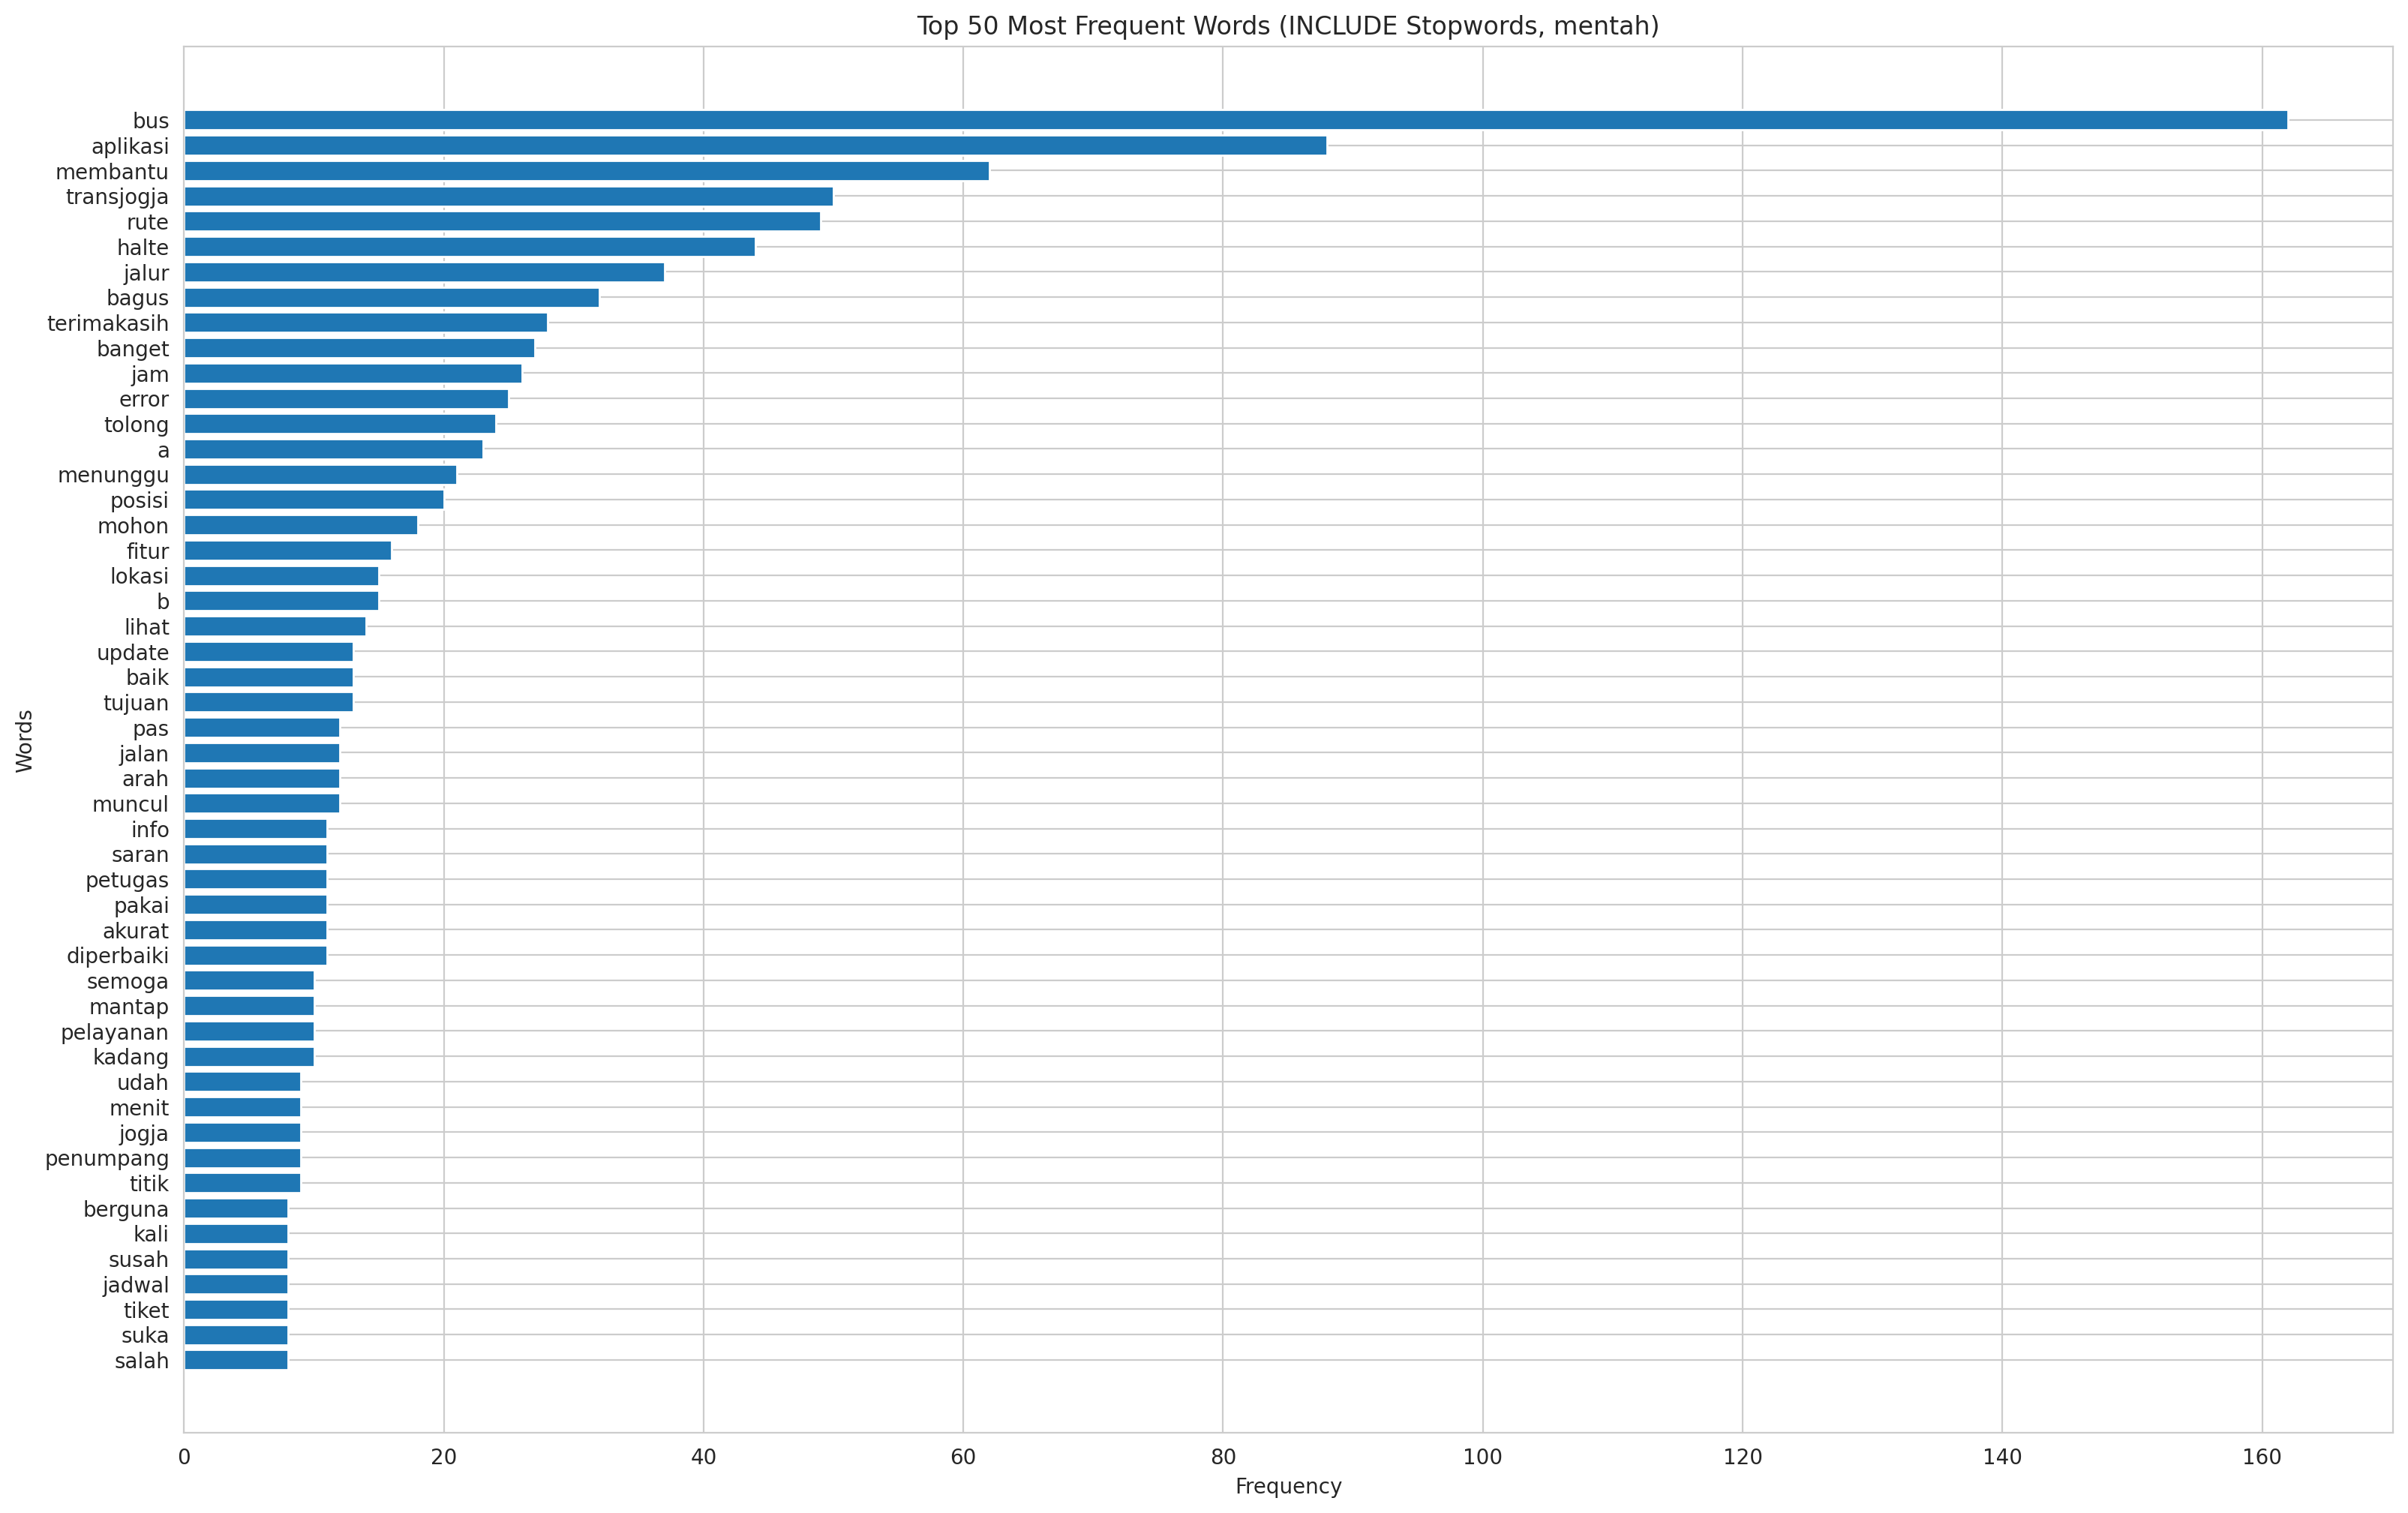

,Word,Frequency
0,l,1
1,instruksi,1
2,inovasi,1
3,kembangkan,1
4,semangat,1
5,kendala,1
6,wajar,1
7,work,1
8,dipahami,1
9,diterima,1


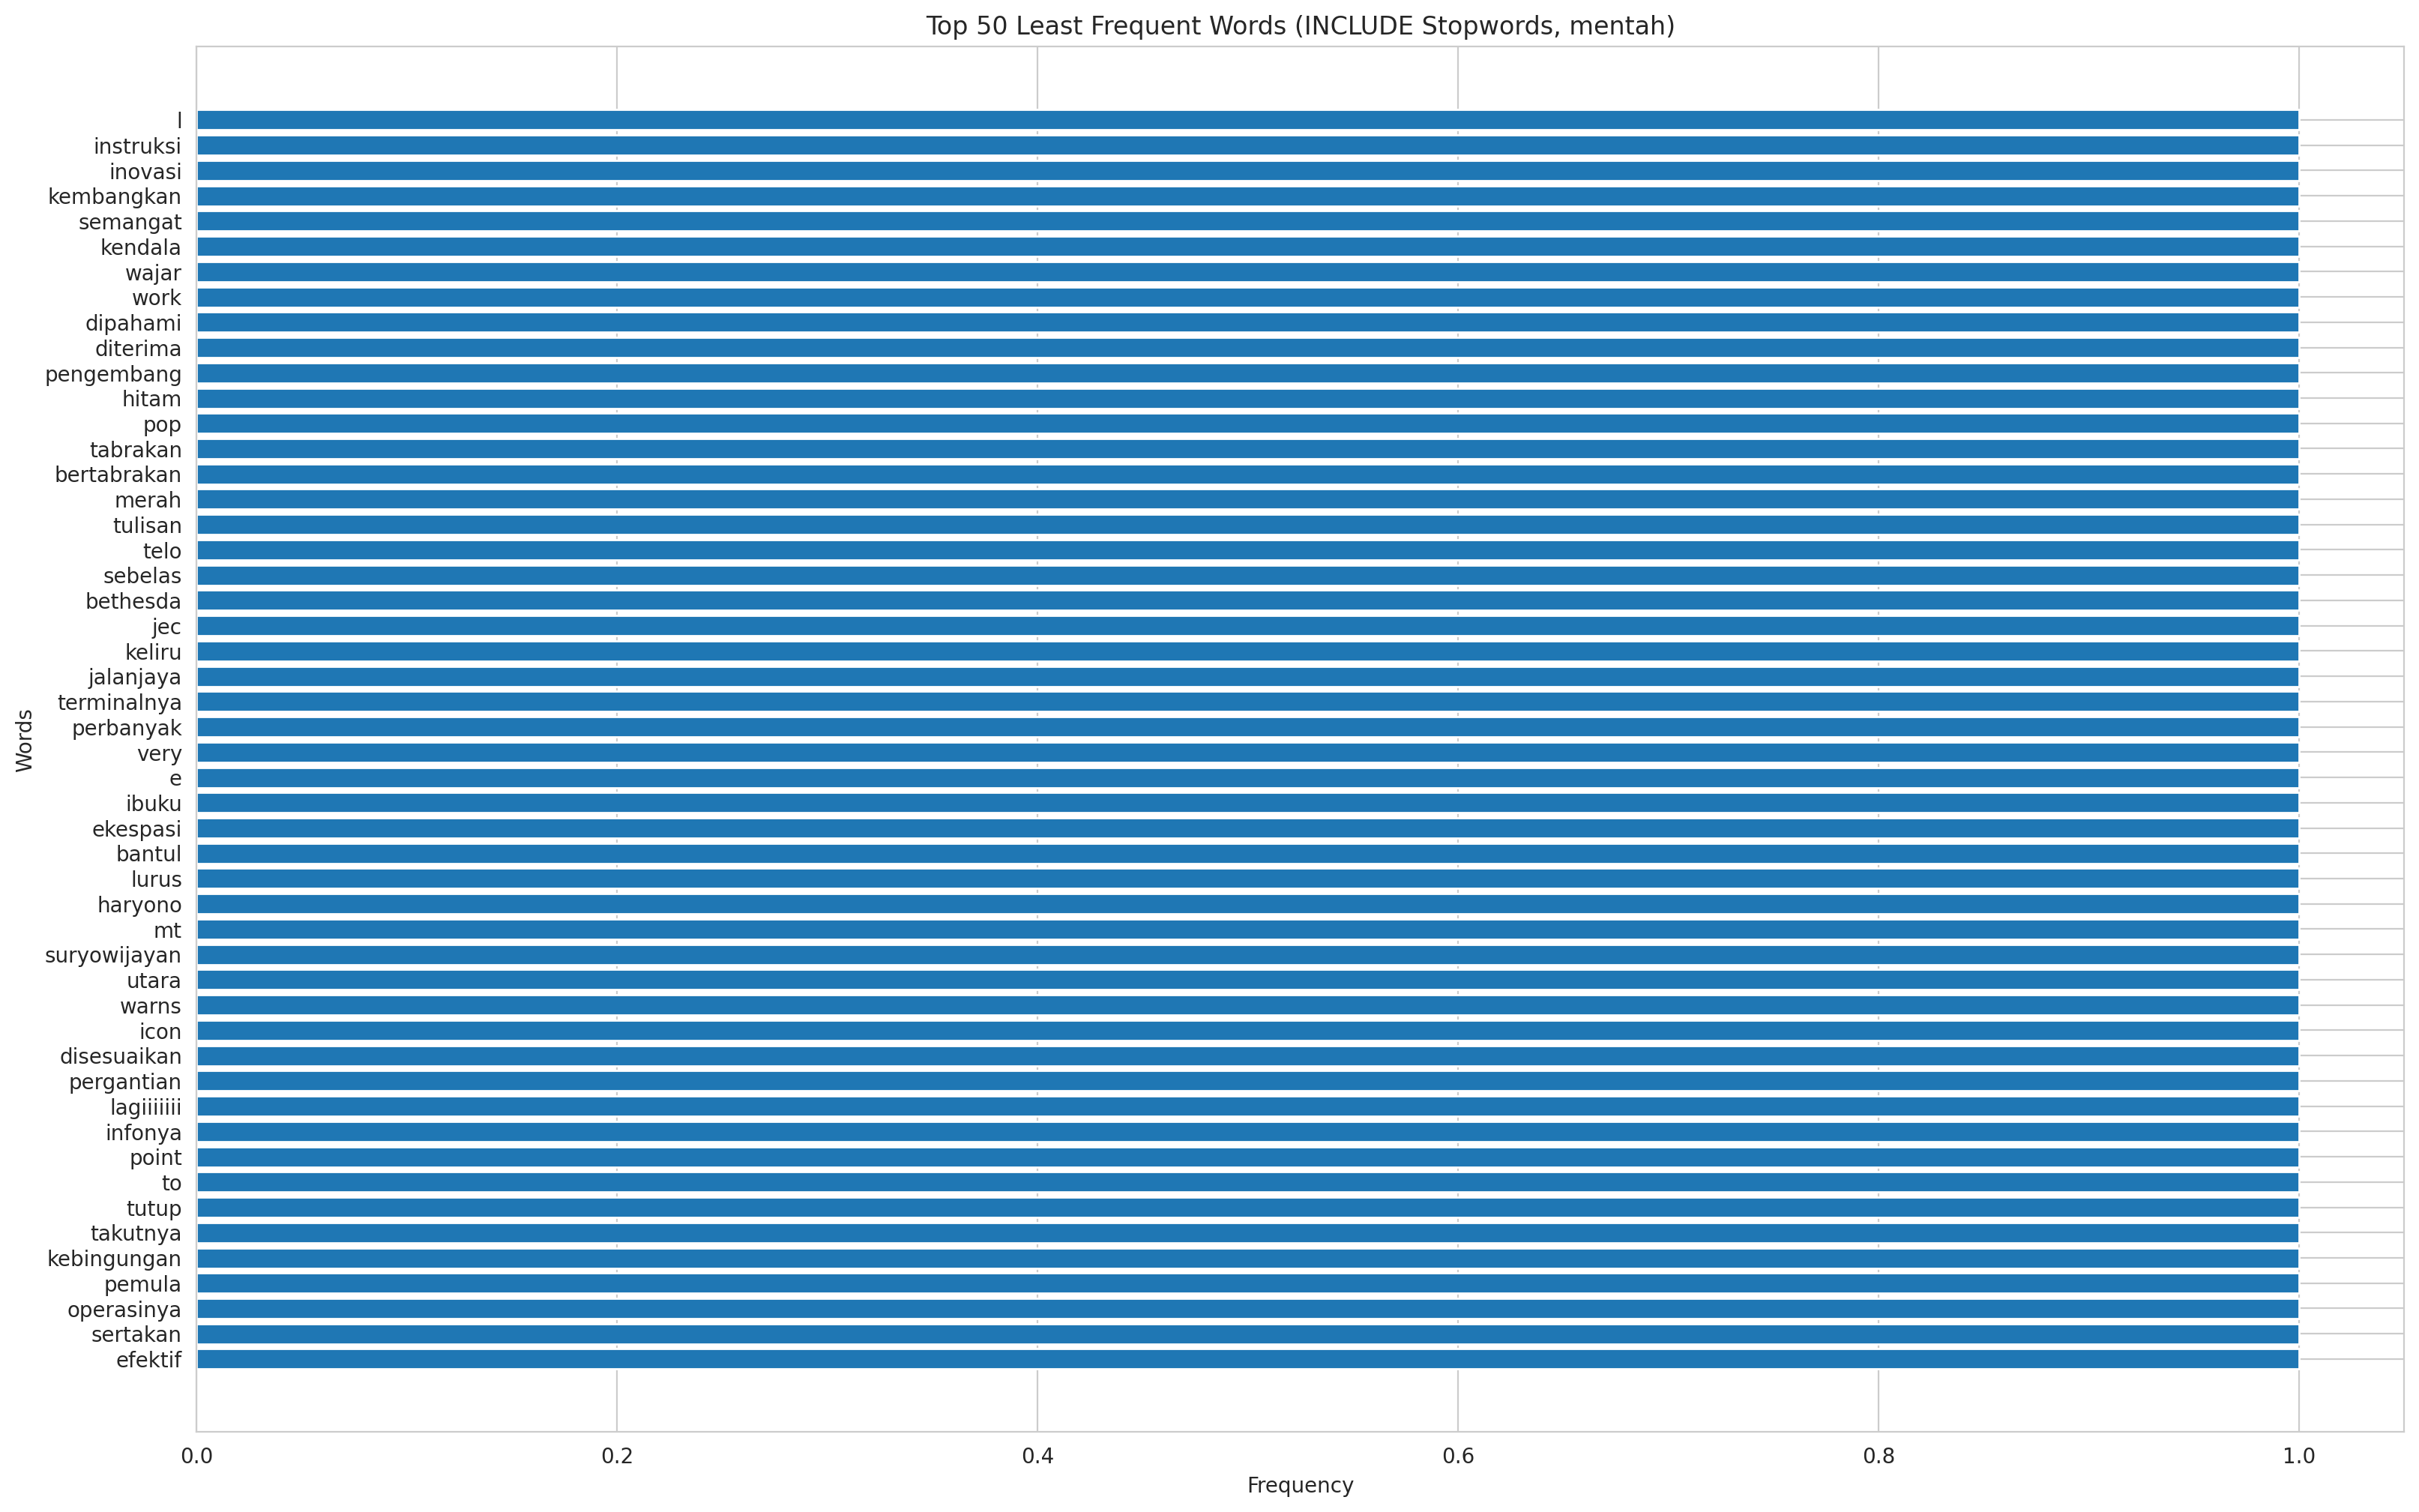

In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Assuming the text column is named 'text', update accordingly
text_column = 'content_cleaned_stopwords'  # Change this if the column has a different name

# Combine all text data into one string
all_text = ' '.join(df_transjog[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
#filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(words)
common_words = word_counts.most_common(50)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words
plt.figure(figsize=(19, 12))
plt.barh(word_freq_df['Word'][::-1], word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Most Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()

# ambil 50 kata paling jarang muncul
least_common_words = word_counts.most_common()[:-51:-1]  # ambil dari belakang
least_word_freq_df = pd.DataFrame(least_common_words, columns=['Word', 'Frequency'])

# tampilkan tabel
display(least_word_freq_df)

# plot
plt.figure(figsize=(19, 12))
plt.barh(least_word_freq_df['Word'][::-1], least_word_freq_df['Frequency'][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Least Frequent Words (INCLUDE Stopwords, mentah)")
plt.show()


### Remove least

#### Cek lagi dulu

,Word,Frequency
0,terkadang,2
1,dilengkapi,2
2,gopay,2
3,dana,2
4,etiket,2
...,...,...
837,semangat,1
838,kembangkan,1
839,inovasi,1
840,instruksi,1


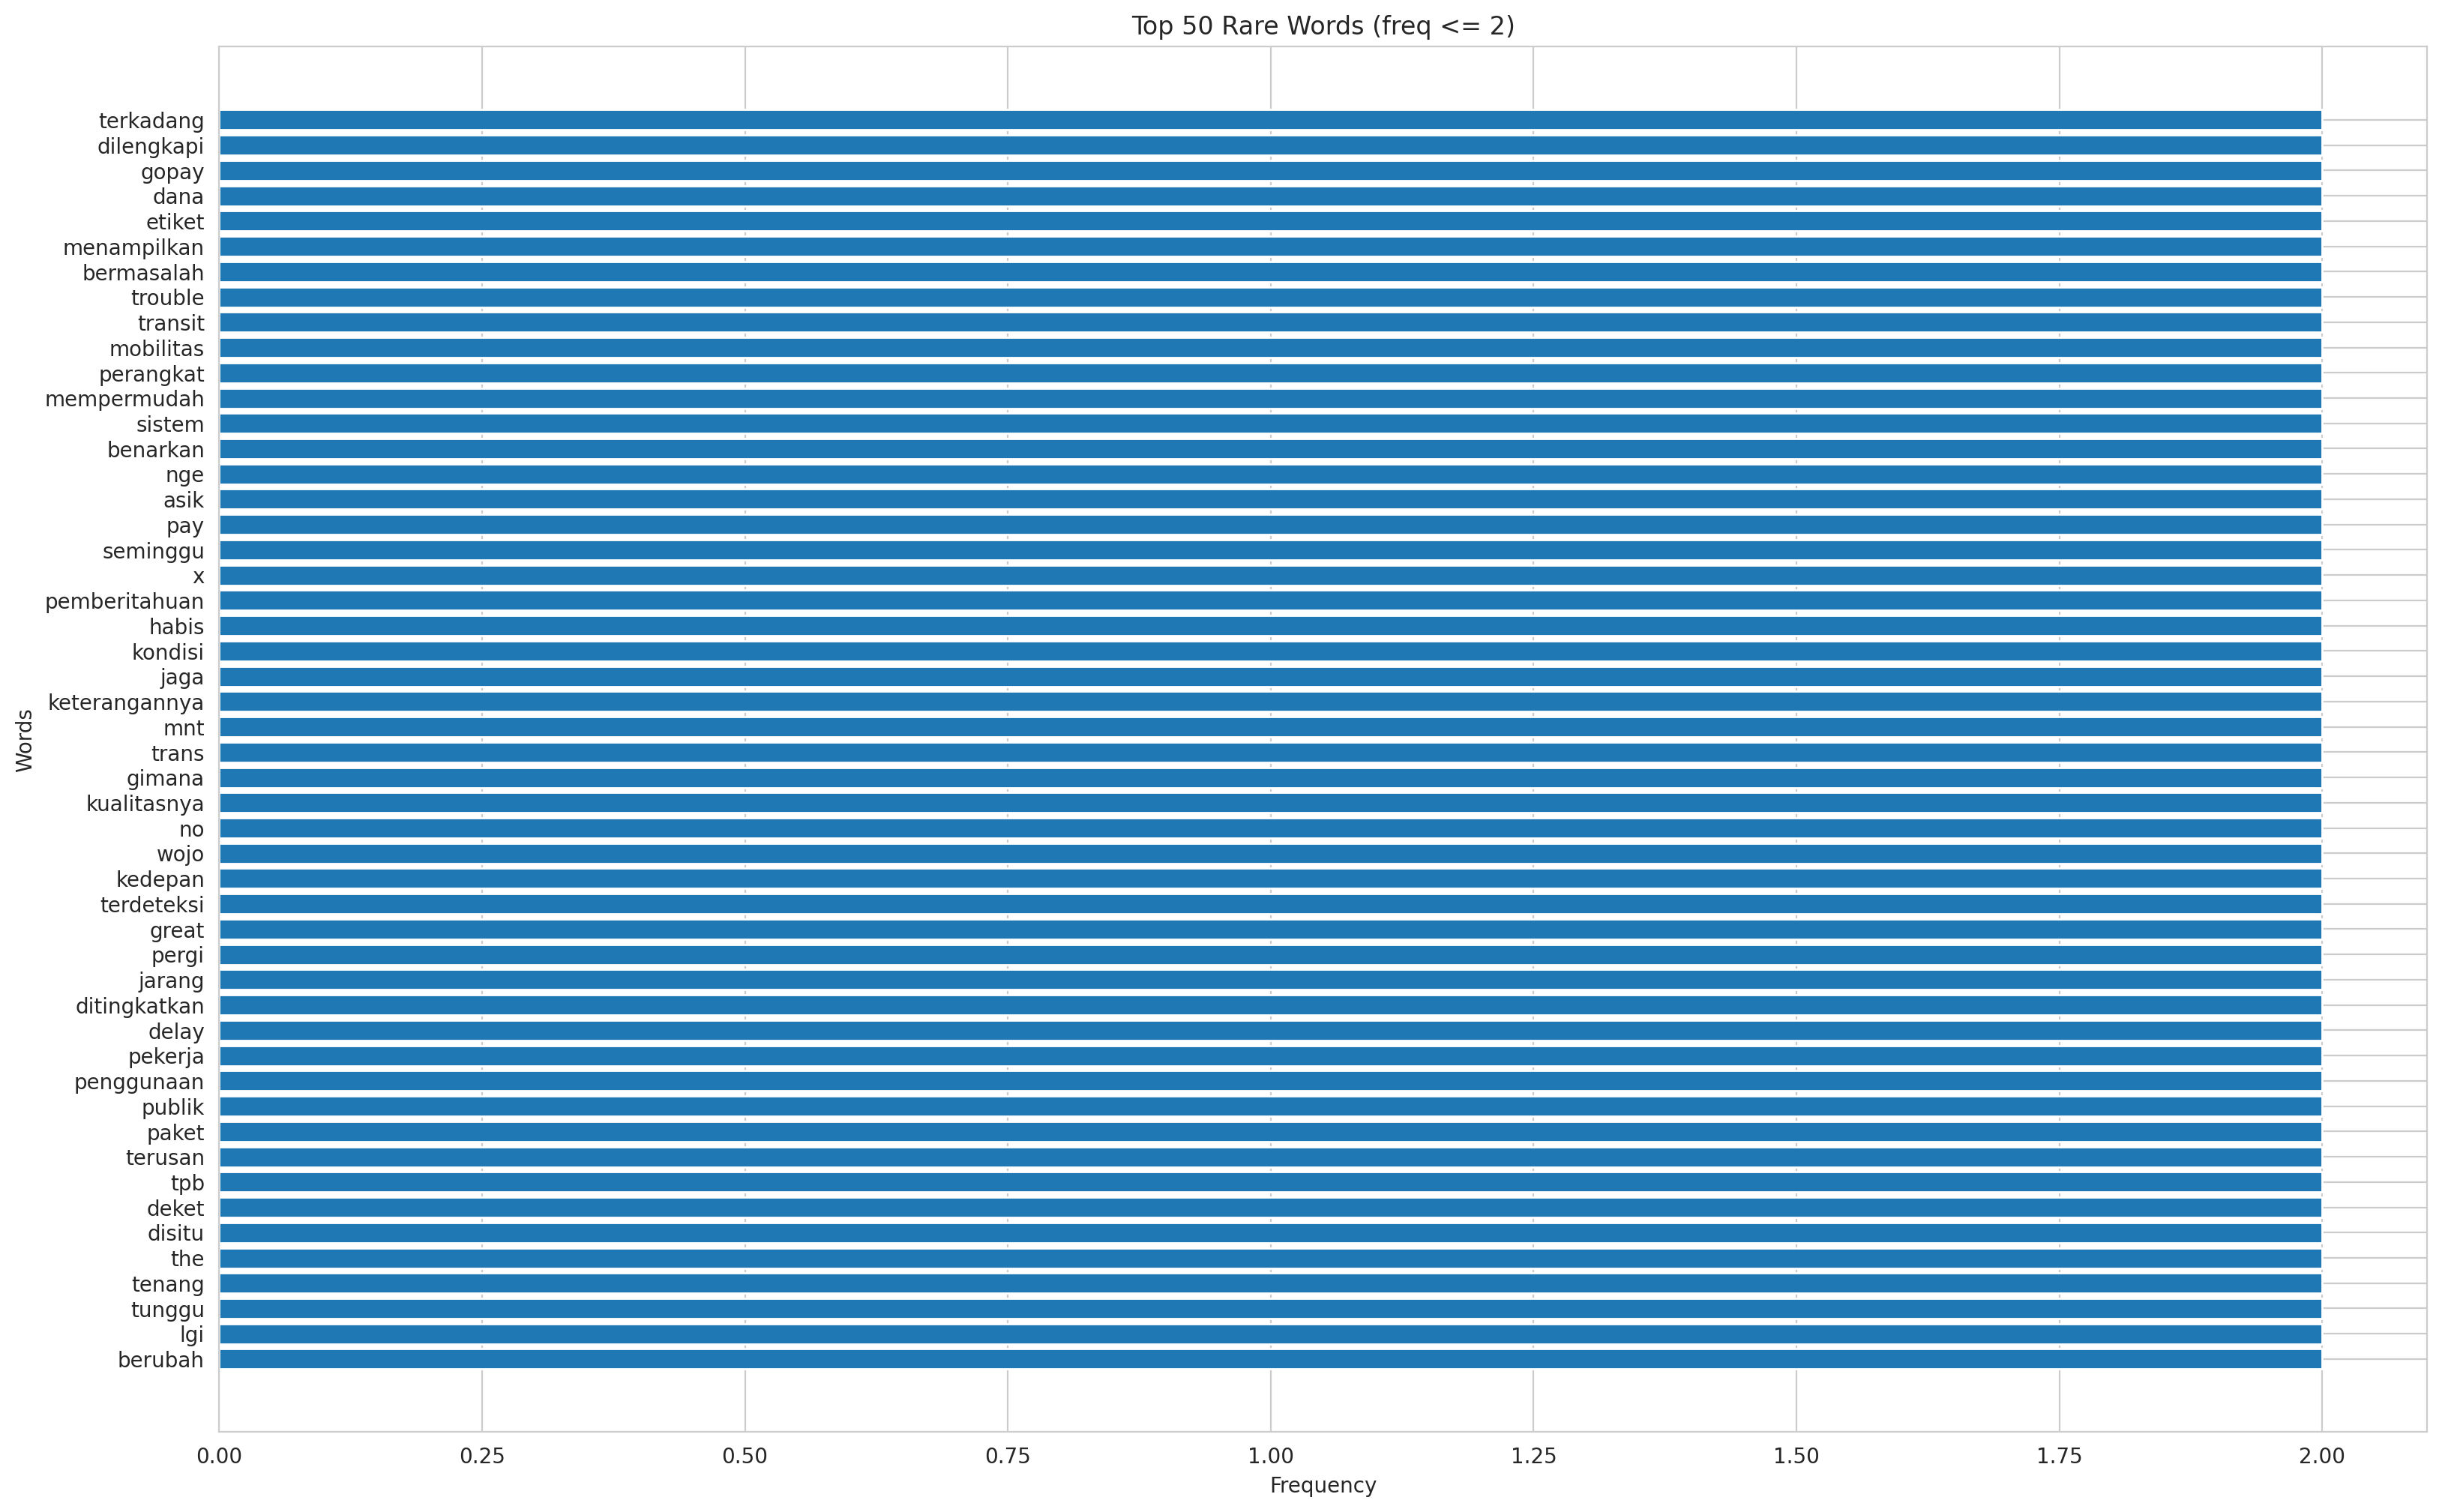

total tokens: 2728
rare tokens (freq <=2): 977
persentase rare tokens: 35.81%


In [26]:
# ambil kata yg freq <= 2
rare_counts = {word: count for word, count in word_counts.items() if count <= 2}

# ubah ke Counter biar gampang
rare_word_counts = Counter(rare_counts)

# convert ke DataFrame
rare_word_freq_df = pd.DataFrame(rare_word_counts.most_common(), columns=['Word', 'Frequency'])
display(rare_word_freq_df)

# plot (optional, top 50 rare)
plt.figure(figsize=(19, 12))
plt.barh(rare_word_freq_df['Word'][:50][::-1], rare_word_freq_df['Frequency'][:50][::-1])
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 50 Rare Words (freq <= 2)")
plt.show()

# total semua token
total_tokens = sum(word_counts.values())

# total token yg freq <= 2
rare_tokens = sum(count for word, count in word_counts.items() if count <= 2)

# persentase
rare_percentage = (rare_tokens / total_tokens) * 100

print(f"total tokens: {total_tokens}")
print(f"rare tokens (freq <=2): {rare_tokens}")
print(f"persentase rare tokens: {rare_percentage:.2f}%")



#### Ngapus

In [27]:
# kumpulin kata yang freq <= 2
rare_words = {word for word, count in word_counts.items() if count <= 2}

# bikin kolom baru yg udah bersih dari rare words
df_transjog['content_cleaned_stopwords_filtered'] = df_transjog[text_column].apply(
    lambda x: ' '.join([w for w in str(x).split() if w not in rare_words])
)

# cek hasilnya
print(df_transjog[['content_cleaned_stopwords', 'content_cleaned_stopwords_filtered']].head())

                                                                                                                                           content_cleaned_stopwords  \
0                                                                                                                                   aplikasi berguna terkadang error   
1                                                                                                                             membantu pulang sekolah menghemat uang   
2  aplikasi ringan metode pembayaran dilengkapi dg transfer bank gopay dana ovo dl memudahkan beli etiket online semoga update menampilkan metode pembayaran beragam   
3                                                                                                                                                                oke   
4                                                                                                                                                              b

## STEMMING/LEMMATIZATION

### Install Sastrawi

In [28]:

!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.8 MB/s eta 0:00:00


### Inisialisasi, apply, cek

In [29]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming ke clean_tokens
df_transjog['stemmed_tokens'] = df_transjog['clean_tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

# Kalau mau bikin string lagi (buat TF-IDF atau ML klasik)
df_transjog['final_text'] = df_transjog['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cek hasil
print(df_transjog[['content_cleaned', 'clean_tokens', 'stemmed_tokens', 'final_text']].head())

                                                                                                                                                                                           content_cleaned  \
0                                                                                                                                                                    aplikasi berguna tapi terkadang error   
1                                                                                                                                                               membantu pulang sekolah dan menghemat uang   
2  aplikasi ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank gopay dana ovo dl sehingga memudahkan untuk beli etiket secara online semoga update selanjutnya bisa menampilkan...   
3                                                                                                                                                                               

### Cek kolom, gabung

In [30]:
# Kolom penting dari review
important_cols = ["content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt","content_cleaned", "content_cleaned_stopwords"]

# Kolom hasil preprocessing
preproc_cols = ["tokens", "clean_tokens", "stemmed_tokens", "final_text"]

# Gabung jadi satu
df_preview = df_transjog.loc[:, important_cols + preproc_cols]

# Biar teks ga kepotong
import pandas as pd
pd.set_option('max_colwidth', 150)

# Tampilkan sample 5 row
display(df_preview.sample(5))

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,content_cleaned,content_cleaned_stopwords,tokens,clean_tokens,stemmed_tokens,final_text
155,"pokoknya saya pribadi sangat puas banget dgn pelayanan bus trans jogya dgn harga tiket nya murah banget lg, mksh bnyk dgn adanya transfortasi bus ...",5,3,2.2.0,2024-01-27 08:02:56,NaN,NaN,pokoknya saya pribadi sangat puas banget dengan pelayanan bus trans jogya dengan harga tiket nya murah banget lg mksh bnyk dengan adanya transfort...,pokoknya pribadi puas banget pelayanan bus trans jogya harga tiket murah banget lg mksh bnyk transfortasi bus,"[pokoknya, saya, pribadi, sangat, puas, banget, dengan, pelayanan, bus, trans, jogya, dengan, harga, tiket, nya, murah, banget, lg, mksh, bnyk, de...","[pokoknya, pribadi, puas, banget, pelayanan, bus, trans, jogya, harga, tiket, murah, banget, lg, mksh, bnyk, transfortasi, bus]","[pokok, pribadi, puas, banget, layan, bus, trans, jogya, harga, tiket, murah, banget, lg, mksh, bnyk, transfortasi, bus]",pokok pribadi puas banget layan bus trans jogya harga tiket murah banget lg mksh bnyk transfortasi bus
2,"aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli etiket...",5,0,NaN,2025-10-10 06:50:15,NaN,NaN,aplikasi ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank gopay dana ovo dl sehingga memudahkan untuk beli etiket secara...,aplikasi ringan metode pembayaran dilengkapi dg transfer bank gopay dana ovo dl memudahkan beli etiket online semoga update menampilkan metode pem...,"[aplikasi, ringan, tapi, sebaiknya, metode, pembayaran, dilengkapi, dg, adanya, transfer, bank, gopay, dana, ovo, dl, sehingga, memudahkan, untuk,...","[aplikasi, ringan, metode, pembayaran, dilengkapi, dg, transfer, bank, gopay, dana, ovo, dl, memudahkan, beli, etiket, online, semoga, update, men...","[aplikasi, ringan, metode, bayar, lengkap, dg, transfer, bank, gopay, dana, ovo, dl, mudah, beli, etiket, online, moga, update, tampil, metode, ba...",aplikasi ringan metode bayar lengkap dg transfer bank gopay dana ovo dl mudah beli etiket online moga update tampil metode bayar agam
113,hallo min tolong yang jalur 13 lama bgt bis cuma 3 ini aku sudah 1jam bis dogkoll,2,0,2.2.1,2024-11-18 06:35:59,NaN,NaN,hallo min tolong yang jalur lama banget bus cuma ini saya sudah jam bus dogkol,hallo min tolong jalur banget bus jam bus dogkol,"[hallo, min, tolong, yang, jalur, lama, banget, bus, cuma, ini, saya, sudah, jam, bus, dogkol]","[hallo, min, tolong, jalur, banget, bus, jam, bus, dogkol]","[hallo, min, tolong, jalur, banget, bus, jam, bus, dogkol]",hallo min tolong jalur banget bus jam bus dogkol
322,baik dan membantu,5,2,1.0.3,2020-10-28 04:49:47,NaN,NaN,baik dan membantu,baik membantu,"[baik, dan, membantu]","[baik, membantu]","[baik, bantu]",baik bantu
318,sangat membantu biar bisa pas jalan ke halte. semoga semua bisa segera normal jadi operasional transjogja juga normal lagi sampai malam,5,5,1.0.5,2020-12-19 05:10:21,NaN,NaN,sangat membantu biar bisa pas jalan ke halte semoga semua bisa segera normal jadi operasional transjogja juga normal lagi sampai malam,membantu biar pas jalan halte semoga normal operasional transjogja normal malam,"[sangat, membantu, biar, bisa, pas, jalan, ke, halte, semoga, semua, bisa, segera, normal, jadi, operasional, transjogja, juga, normal, lagi, samp...","[membantu, biar, pas, jalan, halte, semoga, normal, operasional, transjogja, normal, malam]","[bantu, biar, pas, jalan, halte, moga, normal, operasional, transjogja, normal, malam]",bantu biar pas jalan halte moga normal operasional transjogja normal malam


### Simpan csv clean

In [31]:

# CLEAN data (lengkap dengan preprocessing)
df_transjog_clean = df_transjog.loc[:, [
    "content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt","content_cleaned", "content_cleaned_stopwords","tokens", "clean_tokens", "stemmed_tokens", "final_text"
]]
df_transjog_clean.to_csv("df_transjog_clean.csv", index=False)